#ANÁLISIS DEL COMPORTAMIENTO DE COMPRA DEL CONSUMIDOR

## Planteamiento del problema


El análisis del comportamiento de compra del cliente es un análisis detallado de los clientes ideales de una empresa. Ayuda a una empresa a comprender mejor a sus clientes y les facilita modificar los productos de acuerdo con las necesidades, comportamientos e inquietudes específicas de los diferentes tipos de clientes.

Este análisis ayuda a una empresa a modificar su producto en función de sus clientes objetivo de diferentes tipos de segmentos de clientes. Por ejemplo, en lugar de gastar dinero para comercializar un nuevo producto para cada cliente de la base de datos de la empresa, una empresa puede analizar qué segmento de clientes tiene más probabilidades de comprar el producto y luego comercializarlo sólo en ese segmento en particular.

## LIBRERIAS IMPORTANTES

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.graph_objects as go
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
#Random Forest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# K Neighbor
from sklearn.neighbors import KNeighborsClassifier
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
# XGB
from xgboost import XGBClassifier
# Ada Boost
from sklearn.ensemble import AdaBoostClassifier
# GradientBoosting
from sklearn.ensemble import GradientBoostingClassifier
# SVM
from sklearn.svm import SVC
# Light GBM
import lightgbm as lgb

# Cat Boost
!pip install catboost
from catboost import CatBoostClassifier

from sklearn.cluster import KMeans, AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer

#Redes Neuronales
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

#RNNN LSTM
from tensorflow.keras.layers import LSTM, Dense

#Fully Connectes Neural Network FCNN
from tensorflow.keras.layers import Dense, Flatten

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 6.6 MB/s eta 0:00:00


##Primero comencemos explorando las características del conjunto de datos. Con base en la descripción de los datos, las características se pueden agrupar en información sobre los clientes, información sobre los productos, promociones y el lugar donde se realizaron las compras.

*ATRIBUTOS:*

**Personas:**

ID: identificador único del cliente

Year_Birth: año de nacimiento del cliente

Education: nivel de educación del cliente.

Marital_Status: estado civil del cliente

Income: ingresos anuales del hogar del cliente

Kidhome: Número de niños en el hogar del cliente

Teenhome: Número de adolescentes en el hogar del cliente

Dt_Customer: Fecha de alta del cliente en la empresa

Recency: número de días desde la última compra del cliente.

Complain: 1 si el cliente se quejó en los últimos 2 años, 0 en caso contrario

**Productos:**

MntWines: Cantidad gastada en vino en los últimos 2 años

MntFruits: Monto gastado en frutas en los últimos 2 años

MntMeatProducts: Cantidad gastada en carne en los últimos 2 años

MntFishProducts: cantidad gastada en pescado en los últimos 2 años

MntSweetProducts: cantidad gastada en dulces en los últimos 2 años

MntGoldProds: cantidad gastada en oro en los últimos 2 años

**Promoción:**

NumDealsPurchases: Número de compras realizadas con descuento

AcceptedCmp1: 1 si el cliente aceptó la oferta en la primera campaña, 0 en caso contrario

AcceptedCmp2: 1 si el cliente aceptó la oferta en la segunda campaña, 0 en caso contrario

AcceptedCmp3: 1 si el cliente aceptó la oferta en la tercera campaña, 0 en caso contrario

AcceptedCmp4: 1 si el cliente aceptó la oferta en la cuarta campaña, 0 en caso contrario

AcceptedCmp5: 1 si el cliente aceptó la oferta en la quinta campaña, 0 en caso contrario

Response: 1 si el cliente aceptó la oferta en la última campaña, 0 en caso contrario

**Lugar**

NumWebPurchases: Número de compras realizadas a través del sitio web de la empresa

NumCatalogPurchases: Número de compras realizadas mediante un catálogo

NumStorePurchases: Número de compras realizadas directamente en tiendas

NumWebVisitsMonth: Número de visitas al sitio web de la empresa en el último mes

#IMPORTAR CONJUNTO DE DATOS

In [52]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [53]:
# Ruta del archivo(datasets) en Google Drive
ruta_archivo = "/content/drive/MyDrive/TFM2 Coronel Joel/TFM Compartido/TFM otros dataset/dataset vinos/marketing_campaign.csv"

# Lee los archivos de Excel en un DataFrame de pandas
df = pd.read_csv(ruta_archivo, sep="\t")

In [54]:
from tabulate import tabulate

# Escoger 5 filas aleatorias del DataFrame
filas_aleatorias1 = df.sample(5)

# Mostrar el Dataframe de manera más bonita y ordenada utilizando tabulate
print(tabulate(filas_aleatorias1, headers='keys', tablefmt='fancy_grid'))

╒══════╤═══════╤══════════════╤═════════════╤══════════════════╤══════════╤═══════════╤════════════╤═══════════════╤═══════════╤════════════╤═════════════╤═══════════════════╤═══════════════════╤════════════════════╤════════════════╤═════════════════════╤═══════════════════╤═══════════════════════╤═════════════════════╤═════════════════════╤════════════════╤════════════════╤════════════════╤════════════════╤════════════════╤════════════╤═════════════════╤═════════════╤════════════╕
│      │    ID │   Year_Birth │ Education   │ Marital_Status   │   Income │   Kidhome │   Teenhome │ Dt_Customer   │   Recency │   MntWines │   MntFruits │   MntMeatProducts │   MntFishProducts │   MntSweetProducts │   MntGoldProds │   NumDealsPurchases │   NumWebPurchases │   NumCatalogPurchases │   NumStorePurchases │   NumWebVisitsMonth │   AcceptedCmp3 │   AcceptedCmp4 │   AcceptedCmp5 │   AcceptedCmp1 │   AcceptedCmp2 │   Complain │   Z_CostContact │   Z_Revenue │   Response │
╞══════╪═══════╪══════════

# Exploración de los datos

In [55]:
# Display the shape of the dataset
print(f"Forma del conjunto de datos: {df.shape}")

# Display general information about the dataset
print("\nInformación acerca del Dataset:")
df.info()

# Check for missing values and display a summary
missing_values = df.isnull().sum()

if missing_values.any():
    print("\nResumen de valores faltantes:")
    print(missing_values)
else:
    print("\nNo se encontraron valores faltantes en el conjunto de datos.")

Forma del conjunto de datos: (2240, 29)

Información acerca del Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds   

#PREPROCESAMIENTO DE LOS DATOS Y SELECCIÓN DE CARACTERÍSTICAS

**Columnas : Z_CostContact y Z_Revenue**

Podemos ver dos columnas 'Z_CostContact' y 'Z_Revenue' que no han sido descritas por los datos. Por ellos se procede a eliminar dichas columnas porque no contribuirán en nada en la construcción del modelo.

In [56]:
df = df.drop(['Z_CostContact', 'Z_Revenue'],axis=1)

**Columna: ID**

De igual manera la columna 'ID' no nos aporta nada de información por ende la eliminamos de igual manera

In [57]:
df = df.drop(['ID'],axis=1)

**Columna : Income**

Se completa el valor faltante de la columna 'Income' con el valor de la media

In [58]:
df['Income'] = df['Income'].fillna(df['Income'].mean())

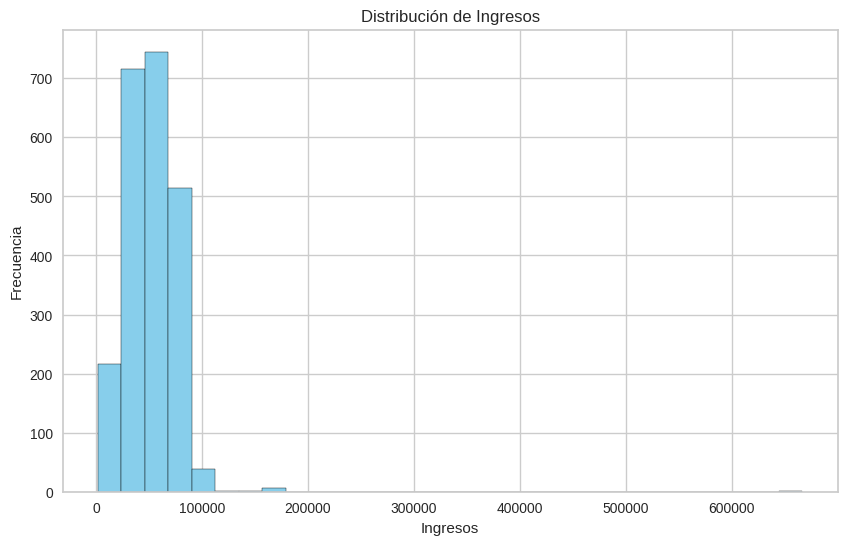

In [59]:
plt.figure(figsize=(10, 6))
plt.hist(df['Income'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribución de Ingresos')
plt.xlabel('Ingresos')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

Eliminaremos si hay filas duplicadas

In [60]:
df.drop_duplicates(inplace=True)

**Columnas : Education y Marital_Status**

Observamos que tenemos 3 columnas que no son del tipo enteras, vamos a trabajar primero con las columnas 'Education' y 'Marital_Status'

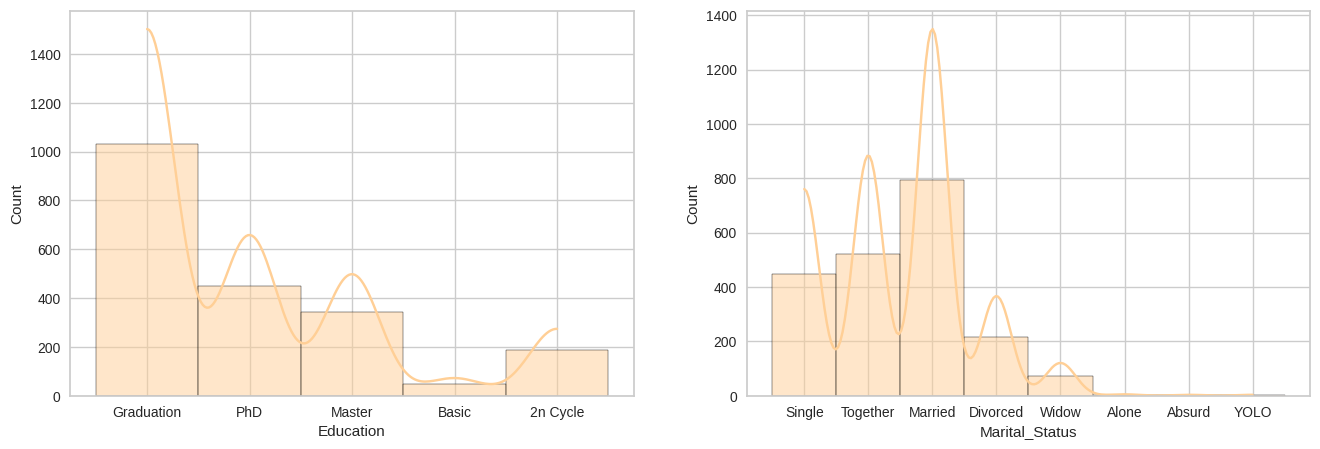

In [61]:
var_cat = df.select_dtypes(include=['object','category']).columns
var_cat = var_cat.drop('Dt_Customer')
# Luego vemos porqué eliminé Dt_Customer

fig, ax = plt.subplots(1, len(var_cat), figsize=(16, 5))

for i, cat in enumerate(var_cat):
    sns.histplot(data=df, x=cat, kde=True, ax=ax[i])

Consideraría apropiado usar Ordinal o Label Encoder en 'Education', agrupando en dos cluster, Basic y 2n Cycle como Basica es decir cero, y Graduation, Master y PhD como Superior o 1.

In [62]:
df['Education'] = df['Education'].apply(
    lambda x: 1 if x in ['Graduation','Master','PhD'] else 0
)

'Marital_Status' vamos a usarlo en binario, si está con pareja es 1: (Together, Married) y si está solo es 0: (Single,Divorced, Widow,Alone,Absurd,YOLO)

In [63]:
df['Marital_Status'] = df['Marital_Status'].apply(
    lambda x: 1 if x in ['Married','Together'] else 0
)

Verficamos como quedó estas 2 columnas

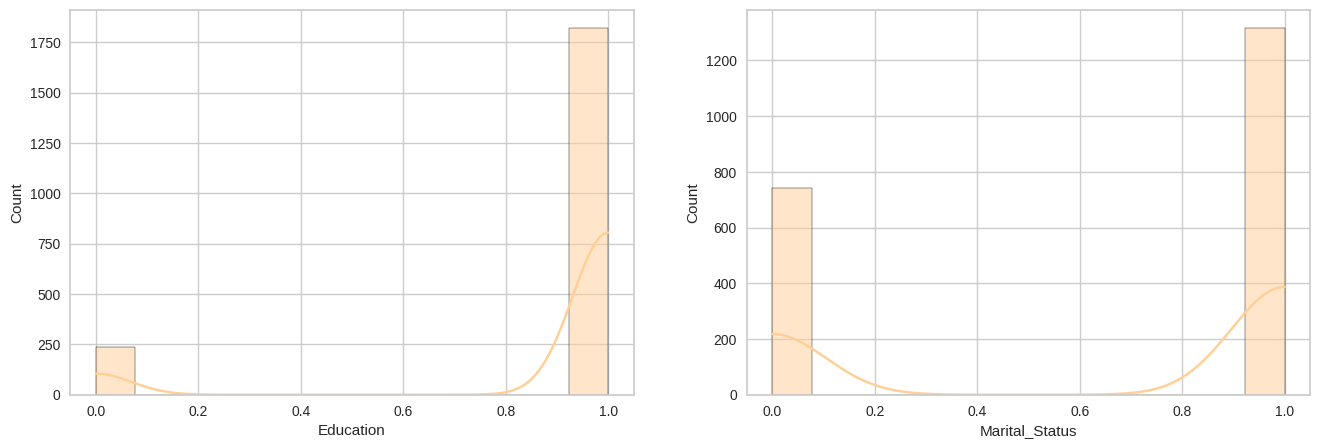

In [64]:
fig, ax = plt.subplots(1, len(var_cat), figsize=(16, 5))
for i, cat in enumerate(var_cat):
    sns.histplot(data=df, x=cat, kde=True, ax=ax[i])

**Columna : Dt_Customer**

Ahora si trabajamos la última variable tipo object 'Dt_customer' la cual contiene la fecha en que se unió un cliente, podemos usar esto para calcular day_engaged, y crear una nueva variable del numero de días que un cliente estuvo interactuando con la empresa.


In [65]:
day_engaged = []
dateTimeDf = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

FirstGuy = dateTimeDf.min()
LastGuy = dateTimeDf.max()
print("El primer cliente apareció en : ", FirstGuy)
print("El último cliente apareció en : ", LastGuy)

print("Nuestro cliente más antiguo ha estado con nosotros : ", (LastGuy-FirstGuy).days , " días.")

for item in df["Dt_Customer"]:
    day_engaged.append((LastGuy - pd.to_datetime(item, format='%d-%m-%Y')).days)

# Add the new column to dataset
df.insert(5,'CustomerAge',day_engaged)

# Drop non-required column
df = df.drop(columns='Dt_Customer')

El primer cliente apareció en :  2012-07-30 00:00:00
El último cliente apareció en :  2014-06-29 00:00:00
Nuestro cliente más antiguo ha estado con nosotros :  699  días.


**Columna : Year_Birth**

Para la variable 'Year_Birth' voy a crear una variable Age ( Viendo la web del dataset, el dataset es del 2014, por lo que no usaré 2024 sino, 2014)

In [66]:
df['Age'] = 2014-df['Year_Birth']

In [67]:
# Voy a eliminarla, no creo que sea necesaria
df.drop(['Year_Birth'], axis=1, inplace=True)

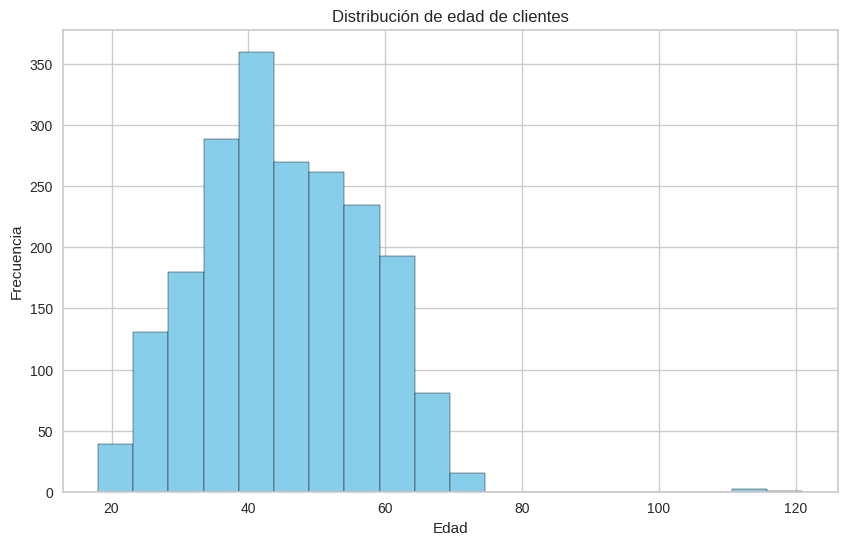

In [68]:
import matplotlib.pyplot as plt
from datetime import datetime

plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribución de edad de clientes')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

**Columnas : Kidhome and Teenhome**

Estas columnas se pueden combinar en una sola columna, como chicos

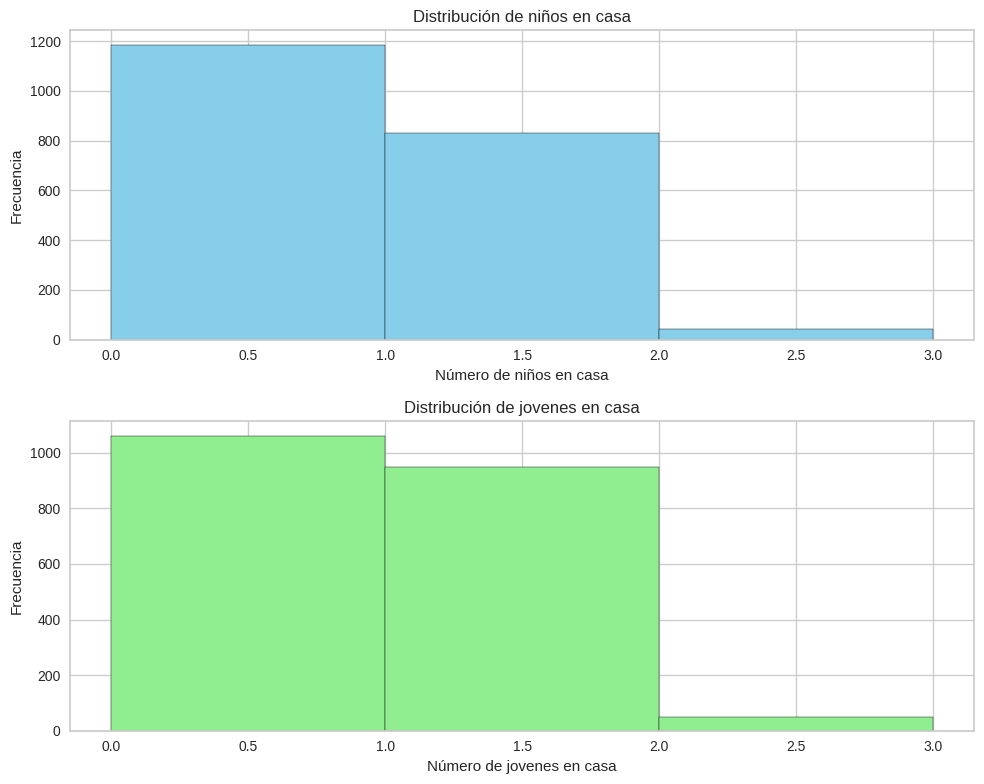

In [69]:
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

axs[0].hist(df['Kidhome'], bins=range(4), color='skyblue', edgecolor='black')
axs[0].set_title('Distribución de niños en casa')
axs[0].set_xlabel('Número de niños en casa')
axs[0].set_ylabel('Frecuencia')
axs[0].grid(True)

axs[1].hist(df['Teenhome'], bins=range(4), color='lightgreen', edgecolor='black')
axs[1].set_title('Distribución de jovenes en casa')
axs[1].set_xlabel('Número de jovenes en casa')
axs[1].set_ylabel('Frecuencia')
axs[1].grid(True)

plt.tight_layout()

plt.show()

In [70]:
df['Kids'] = df['Kidhome'] + df['Teenhome']

**Columnas : AcceptedCmp1, AcceptedCmp2, AcceptedCmp3, AcceptedCmp4 AcceptedCmp5, Response**

Estas columnas se pueden combinar en una sola columna, como numero total de ofertas aceptadas.

In [71]:
df['TotalAcceptedCmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['Response']

In [72]:
col_del = ["AcceptedCmp1" , "AcceptedCmp2", "AcceptedCmp3" , "AcceptedCmp4","AcceptedCmp5", "Response","Kidhome", "Teenhome"]
df=df.drop(columns=col_del,axis=1)

**Columnas : MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds**

Estas columnas indican la cantidad gastada, podemos combinarlas todas en una sola columna.

Sumar diferentes columnas y renombrarlas

In [73]:
df['Expenses'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df=df.rename(columns={'MntWines': "Wines",'MntFruits':'Fruits','MntMeatProducts':'Meat','MntFishProducts':'Fish','MntSweetProducts':'Sweets','MntGoldProds':'Gold'})


**Columnas : NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumDealsPurchases**

Estas columnas indican el numero total de compras por los diferentes medios, por lo que podemos combinarlas todas en una sola columna.

Sumar diferentes columnas y renombrarlas

In [74]:
df['NumTotalPurchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumDealsPurchases']
df=df.rename(columns={'NumWebPurchases': "Web",'NumCatalogPurchases':'Catalog','NumStorePurchases':'Store'})

## OUTLIERS

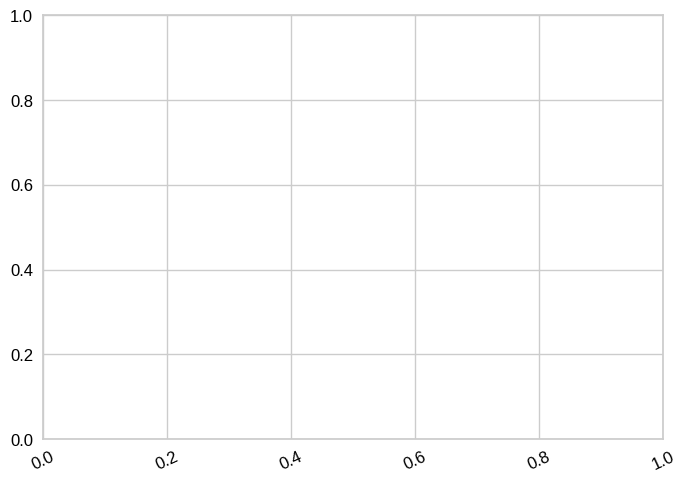

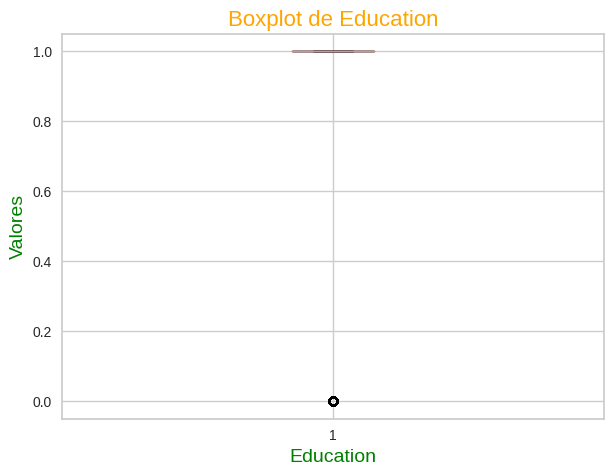

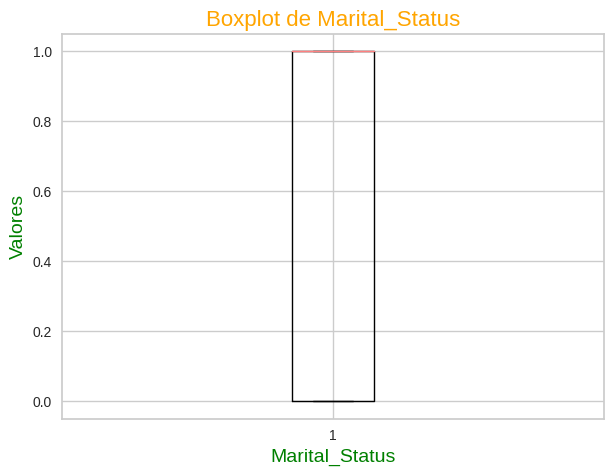

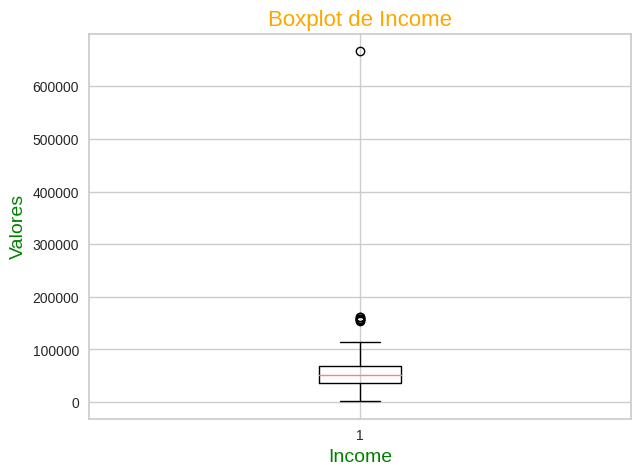

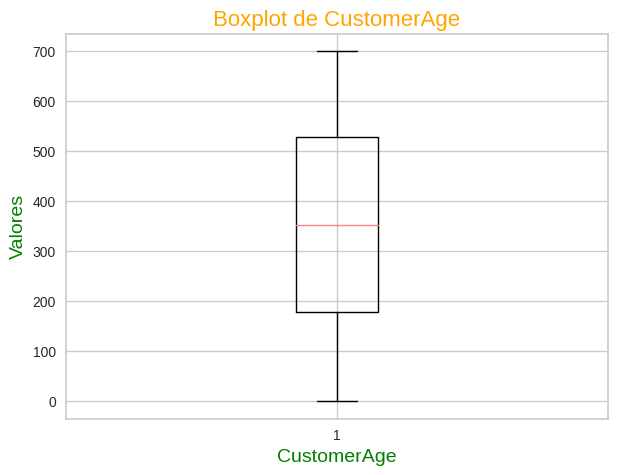

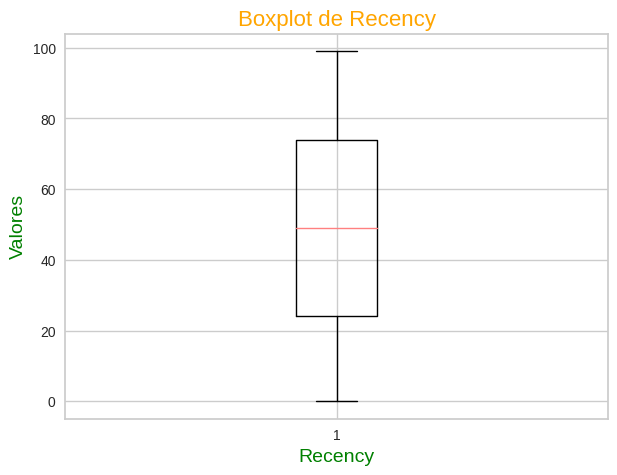

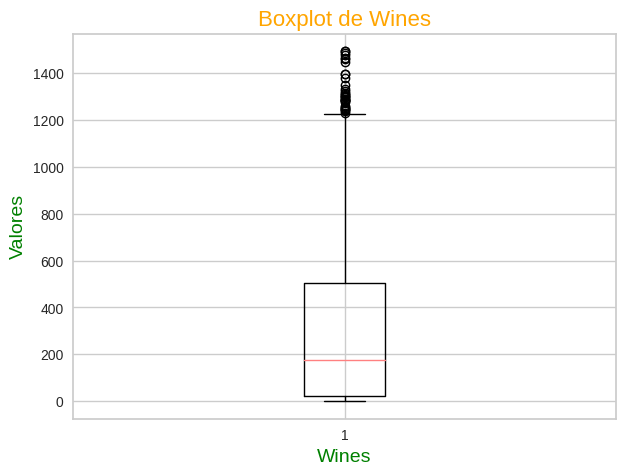

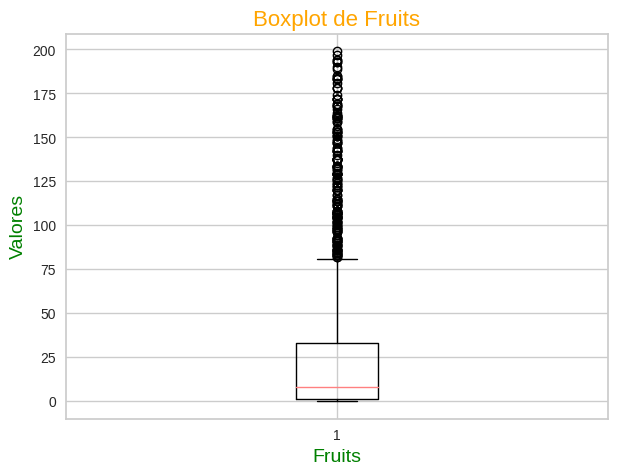

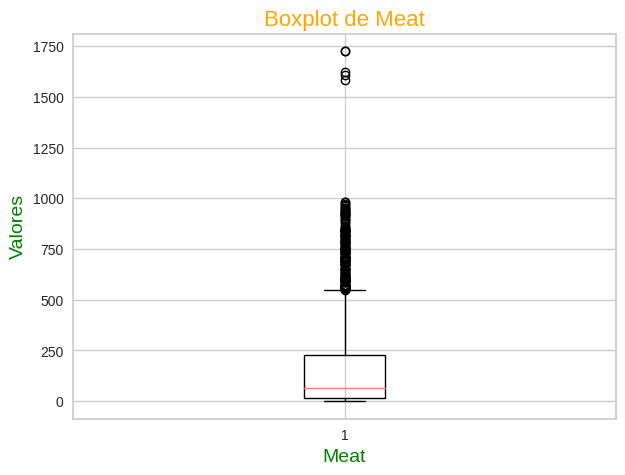

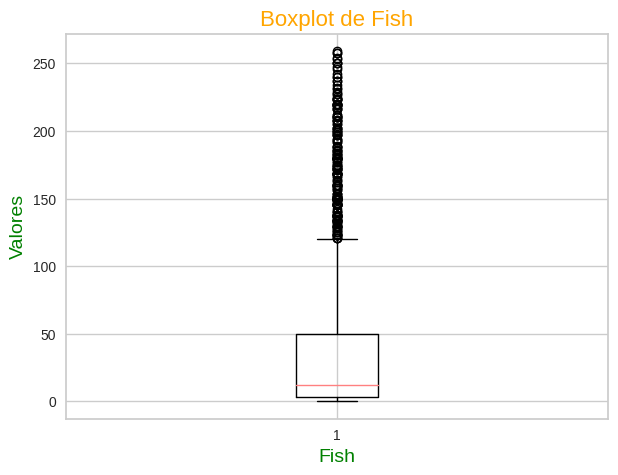

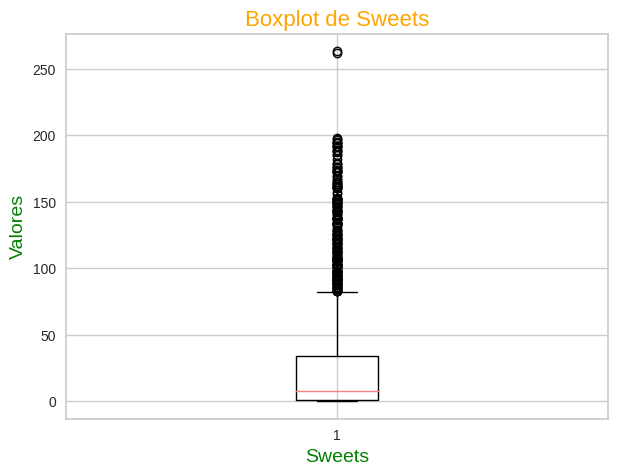

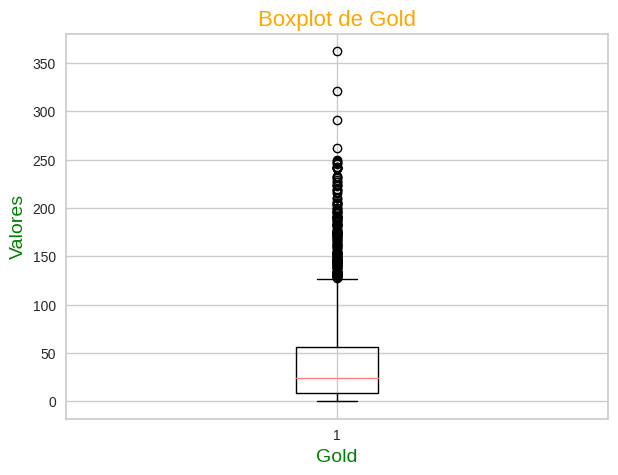

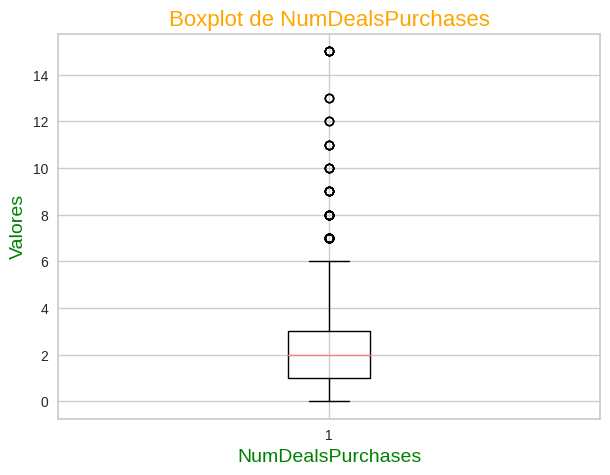

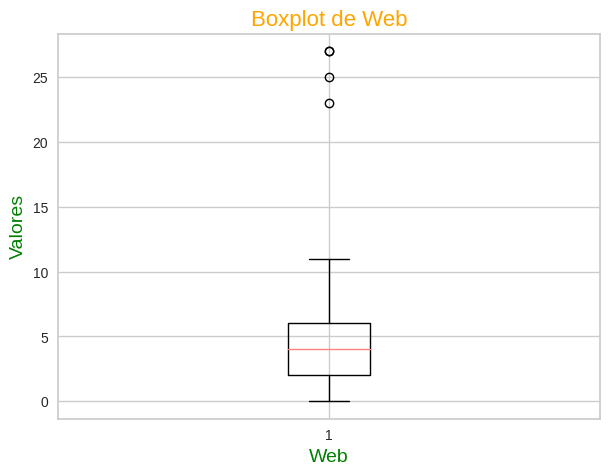

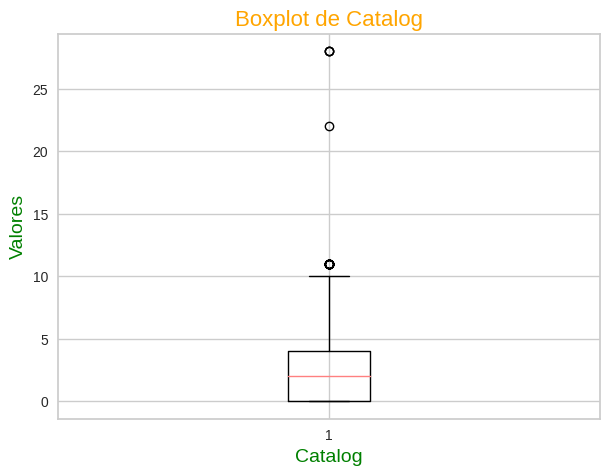

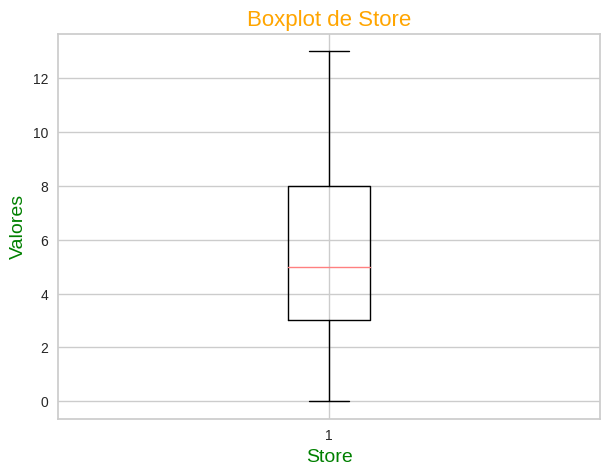

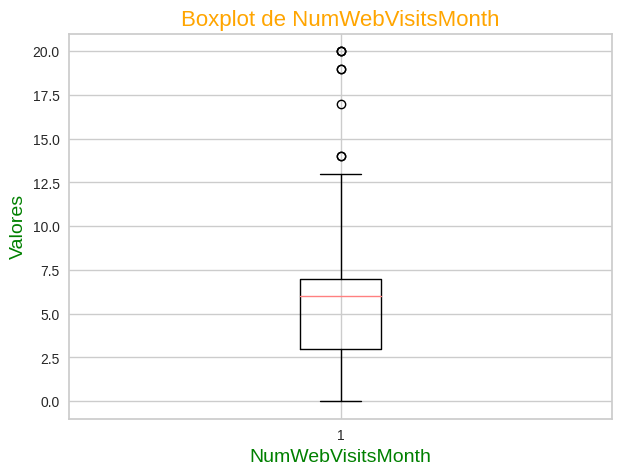

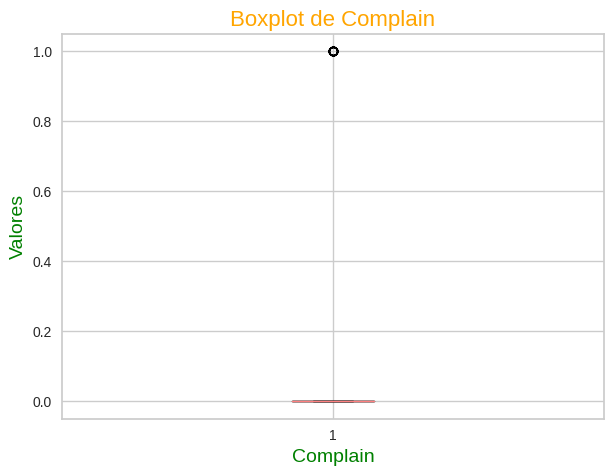

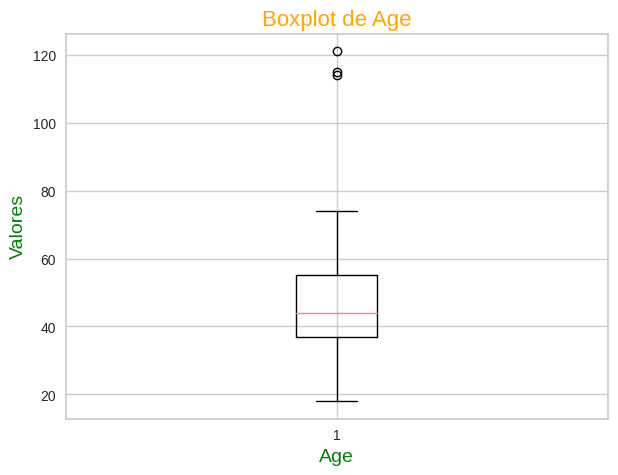

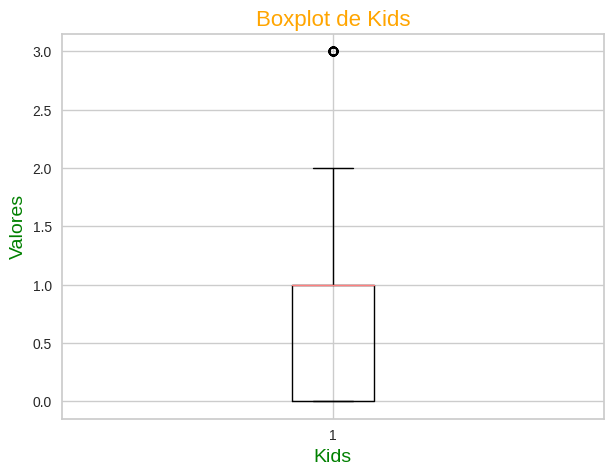

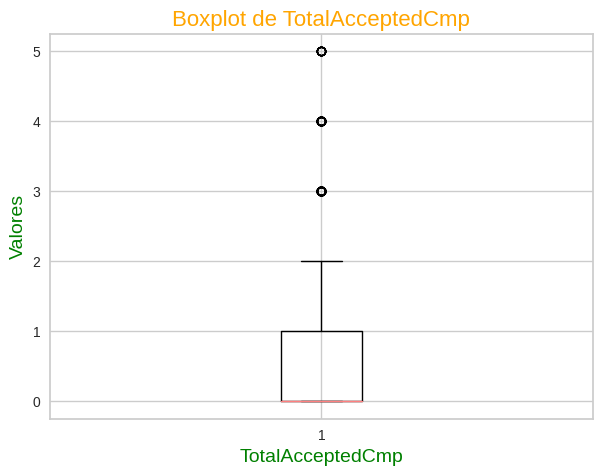

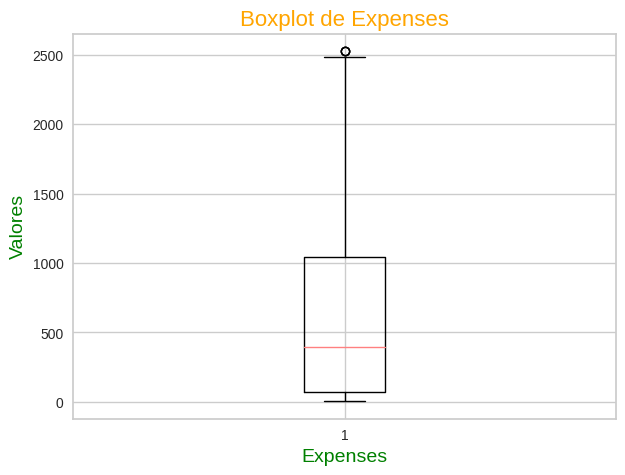

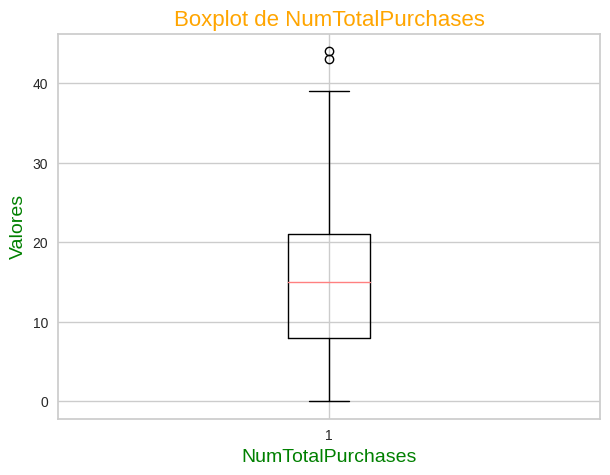

In [75]:
# Configuración de propiedades de estilo y formato
plt.xticks(rotation=25, color='black', size=12)
plt.yticks(color='black', size=12)

# Iterar sobre las columnas del DataFrame
for column in df.columns:
    plt.figure(figsize=(7, 5))
    plt.boxplot(df[column])
    plt.title(f'Boxplot de {column}', color='orange', size=16)
    plt.ylabel('Valores', color='green', size=14)
    plt.xlabel(column, color='green', size=14)
    plt.show()

Al observar los anteriores gráficos de cada uno de las variables del dataset, encontramos que los únicos outliers a tratar deben ser 'Age' e 'Income', por lo cual procedemos a tratarlos.

In [76]:
df = df[df['Age']<=80]

# El valor de 666_666 obvio es muy fake, toca eliminarlo
df = df[df['Income']<=200000]

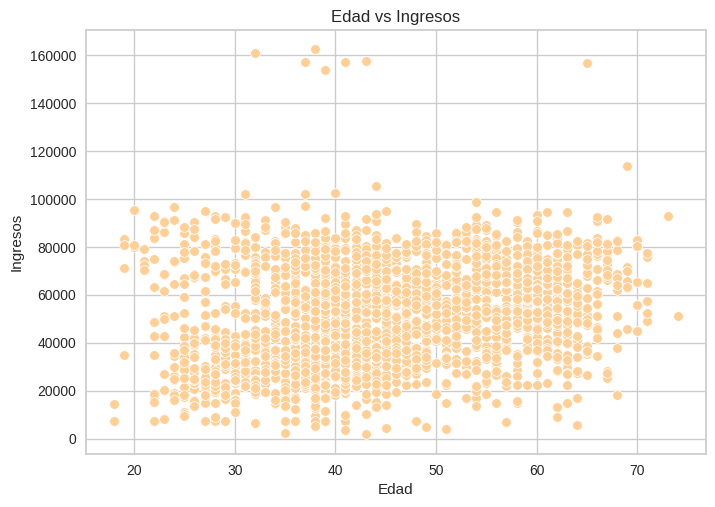

In [77]:
# Figure settings
custom_palette = ["#FFCF96", "#FF8080", "#76ABAE", "#CDFAD5", "#A1EEBD"]
sns.set_palette(custom_palette)

# Create a scatter plot using Seaborn
sns.scatterplot(x='Age', y='Income', data=df)

# Set the title and labels
plt.title('Edad vs Ingresos')
plt.xlabel('Edad')
plt.ylabel('Ingresos')

# Show the plot
plt.show()

In [78]:
# Escoger 5 filas aleatorias del DataFrame
filas_aleatorias = df.sample(5)

# Mostrar el Dataframe de manera más bonita y ordenada utilizando tabulate
print(tabulate(filas_aleatorias, headers='keys', tablefmt='fancy_grid'))

╒══════╤═════════════╤══════════════════╤══════════╤═══════════════╤═══════════╤═════════╤══════════╤════════╤════════╤══════════╤════════╤═════════════════════╤═══════╤═══════════╤═════════╤═════════════════════╤════════════╤═══════╤════════╤════════════════════╤════════════╤═════════════════════╕
│      │   Education │   Marital_Status │   Income │   CustomerAge │   Recency │   Wines │   Fruits │   Meat │   Fish │   Sweets │   Gold │   NumDealsPurchases │   Web │   Catalog │   Store │   NumWebVisitsMonth │   Complain │   Age │   Kids │   TotalAcceptedCmp │   Expenses │   NumTotalPurchases │
╞══════╪═════════════╪══════════════════╪══════════╪═══════════════╪═══════════╪═════════╪══════════╪════════╪════════╪══════════╪════════╪═════════════════════╪═══════╪═══════════╪═════════╪═════════════════════╪════════════╪═══════╪════════╪════════════════════╪════════════╪═════════════════════╡
│  131 │           1 │                0 │    61331 │           476 │        42 │     534 │        5 

## Comprobar la correlación entre los atributos.

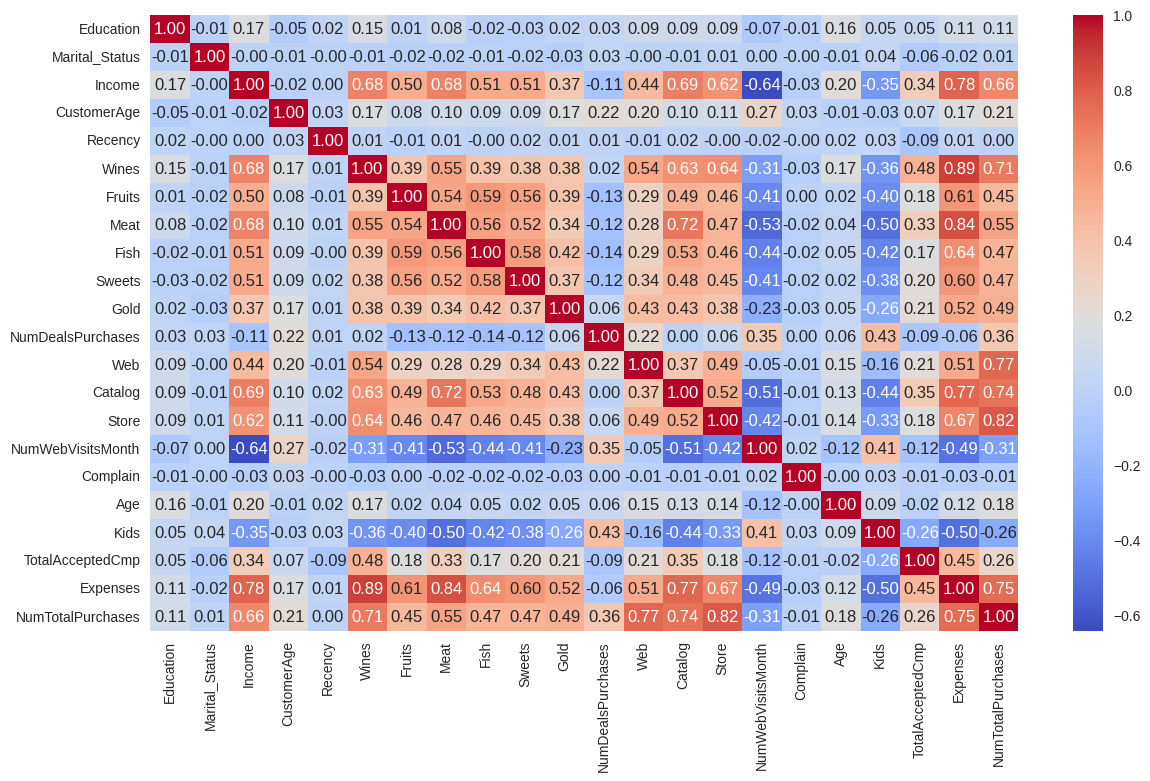

In [79]:
# Seleccionar solo las columnas numéricas del DataFrame
numeric_df = df.select_dtypes(include=['float64', 'int64'])
# Calcular la matriz de correlación
correlation_matrix = numeric_df.corr()
# Configurar el tamaño del gráfico
plt.figure(figsize=(14,8))
# Crear el mapa de calor de la matriz de correlación
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

No hay dos columnas que estén demasiado correlacionadas entre sí, y las mismas que tienen un numero de correlación fuerte son porque una desciende de la otra, por lo que no podemos eliminar ninguna columna en función de la correlación. Sin embargo para ver mas a detalle que variables tienen una fuerte correlación podemos aplicar el siguiente código

In [80]:
# Check the Correlation Report
corr_data = correlation_matrix
corr_data.abs().unstack().sort_values(ascending=False)[24:50:2]

Expenses           Meat                 0.840171
Store              NumTotalPurchases    0.815442
Income             Expenses             0.782231
Expenses           Catalog              0.773661
NumTotalPurchases  Web                  0.770198
Expenses           NumTotalPurchases    0.752263
NumTotalPurchases  Catalog              0.736011
Catalog            Meat                 0.721252
Wines              NumTotalPurchases    0.709696
Catalog            Income               0.688290
Income             Meat                 0.678277
                   Wines                0.676771
Expenses           Store                0.671101
dtype: float64

# Reducción de dimensionalidad con análisis de componentes principales (PCA)

In [81]:
# Copiar el dataseet original para escalarlo
data_scaled = df.copy()

# Estandarizar los datos usando StandardScaler (transforma cada característica
# de modo que tenga una media de 0 y una desviación estándar de 1.)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_scaled)

# Crear un DataFrame con datos escalados y nombres de columnas originales
scaled_data = pd.DataFrame(data_scaled, columns=df.columns)

# Copiar los datos escalados para la transformación PCA
scaled_data_for_pca = scaled_data.copy()

# Aplicar el Análisis de Componentes Principales (PCA) con 3 componentes
pca = PCA(n_components=3, random_state=42)
pca_result = pca.fit_transform(scaled_data_for_pca)

# Crear un DataFrame con datos transformados por PCA y columnas etiquetadas
pca_data = pd.DataFrame(pca_result, columns=["PC1", "PC2", "PC3"])

# Extraer las cargas del modelo PCA.
loadings = pca.components_

# Crear un DataFrame con cargas y columnas etiquetadas
loadings_df = pd.DataFrame(loadings.T, columns=["PC1", "PC2", "PC3"], index=scaled_data.columns)

# Mostrar las cargas
print("Principal Component Loadings:")
print(loadings_df)

Principal Component Loadings:
                        PC1       PC2       PC3
Education          0.040270  0.088537 -0.496387
Marital_Status    -0.007554  0.025125 -0.056820
Income             0.299901 -0.049340 -0.234193
CustomerAge        0.050914  0.309426  0.435566
Recency            0.001178  0.014696 -0.051912
Wines              0.285838  0.143427 -0.089239
Fruits             0.243013 -0.130956  0.158426
Meat               0.287235 -0.134399  0.018472
Fish               0.251390 -0.137312  0.166347
Sweets             0.242229 -0.108916  0.172296
Gold               0.205515  0.110910  0.191204
NumDealsPurchases -0.021864  0.546757  0.016969
Web                0.208561  0.355733  0.026608
Catalog            0.295758 -0.006386 -0.044782
Store              0.270636  0.129318 -0.083805
NumWebVisitsMonth -0.210094  0.352831  0.274745
Complain          -0.010386  0.012955  0.048154
Age                0.053673  0.143931 -0.490326
Kids              -0.195357  0.321765 -0.204772
TotalAccep

#Método del codo para determinar el número de clusters

Método del codo para determinar el número de clusters :


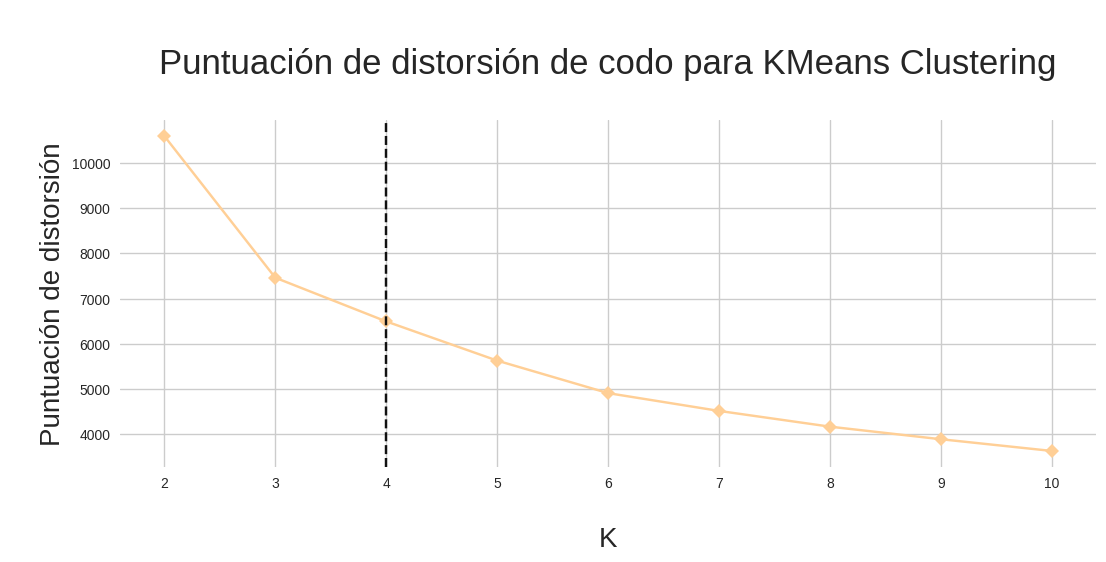

In [82]:
# Imprimir el título del método del codo para determinar el número de clusters.
print("Método del codo para determinar el número de clusters :")

# Crear una trama secundaria para la visualización del método del codo.
_, axes = plt.subplots(figsize=(20,8))

# Inicializa KElbowVisuaizer con KMeans, establece el número de clusters a considerar (k=10),
# deshabilite los tiempos, habilite la localización del punto del codo y establezca el tamaño de la visualización
elbow = KElbowVisualizer(KMeans(), k=10, timings=False, locate_elbow=True, size=(1260,450))

# Ajuste el visualizador a los datos transformados por PCA
elbow.fit(pca_data)

# Establecer título y etiquetas para el gráfico del método del codo
axes.set_title("\nPuntuación de distorsión de codo para KMeans Clustering\n",fontsize=25)
axes.set_xlabel("\nK",fontsize=20)
axes.set_ylabel("\nPuntuación de distorsión",fontsize=20)

# Retire las espinas para una mejor estética.
sns.despine(left=True, bottom=True)

# Mostrar el gráfico
plt.show()

Usaremos k = 4, por lo que habrá cuatro grupos en nuestro conjunto de datos.

# Algoritmo KMeans

In [83]:
km = KMeans(n_clusters = 4,random_state = 42)
# ac = Agrupación Aglomerativa(n_clusters=4)

y_km = km.fit_predict(pca_data)
pca_data["Clusters"] = y_km
df["Clusters"]= y_km

In [84]:
# Analyzing the characteristics of each cluster
cluster_summary = df.groupby('Clusters').mean(numeric_only=True)
cluster_summary.T

Clusters,0,1,2,3
Education,0.990637,0.905018,0.665198,0.950787
Marital_Status,0.666667,0.620072,0.618943,0.651575
Income,42210.787008,75840.004044,29191.559483,56674.038402
CustomerAge,216.750936,356.724014,420.114537,430.820866
Recency,49.582397,49.293907,48.524229,48.324803
Wines,63.777154,607.390681,32.134361,466.759843
Fruits,4.413858,67.718638,6.896476,20.771654
Meat,25.644195,447.546595,24.685022,137.620079
Fish,6.089888,97.465950,10.303965,28.311024
Sweets,4.747191,70.550179,6.671806,21.515748


## Distribución de la cantidad de clientes después de la agrupación.

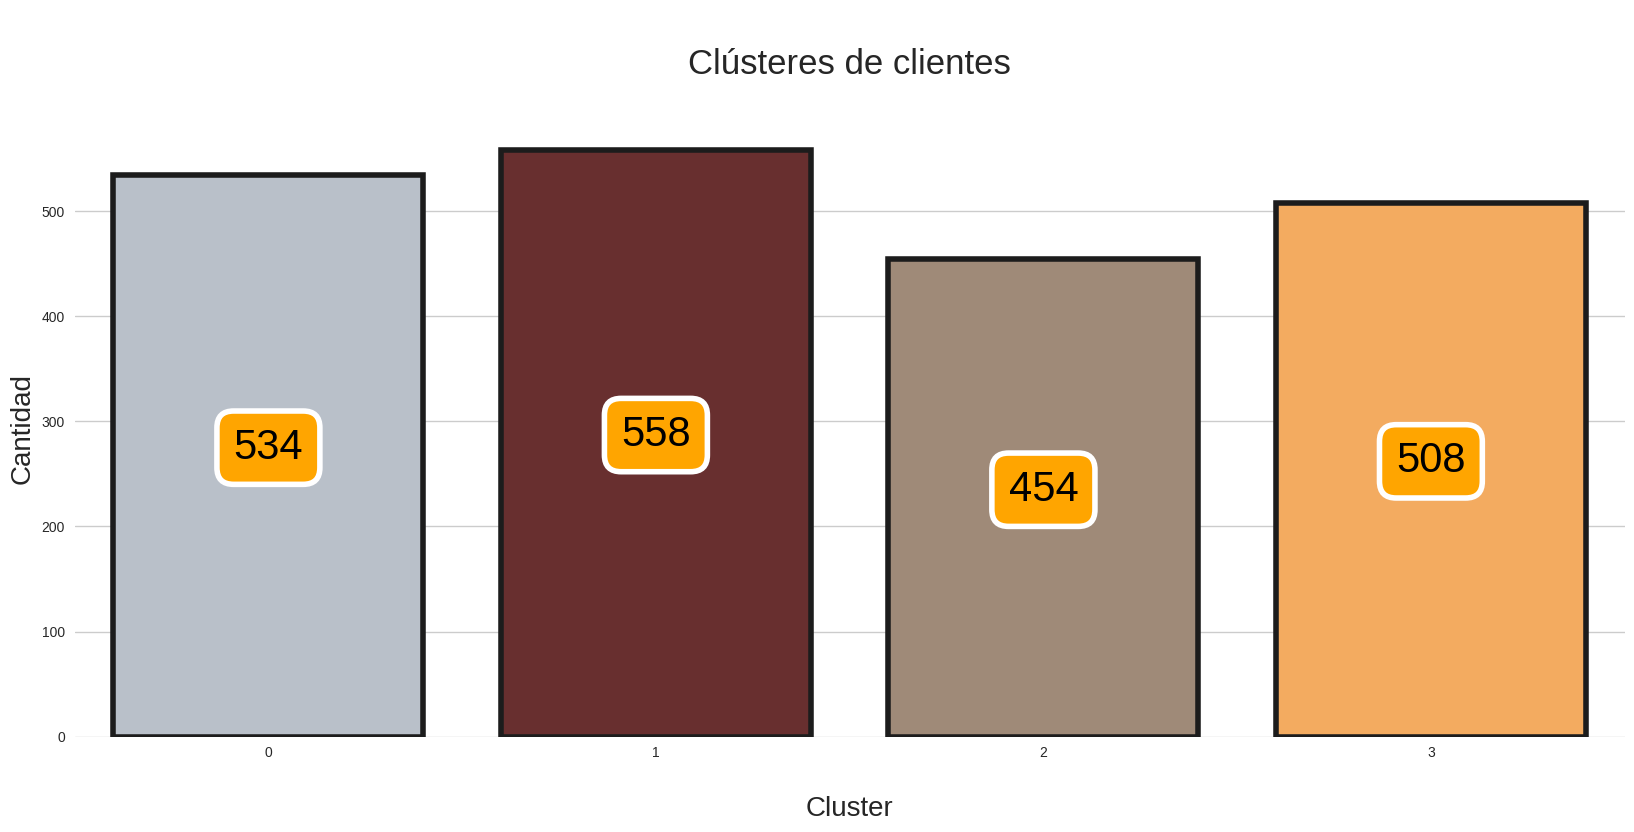

In [85]:
plt.subplots(figsize=(20, 8))
p = sns.countplot(x=df["Clusters"],palette=["#B9C0C9","#682F2F", "#9F8A78","#F3AB60"], saturation=1,edgecolor = "#1c1c1c", linewidth = 4)
p.axes.set_yscale("linear")
p.axes.set_title("\nClústeres de clientes\n",fontsize=25)
p.axes.set_ylabel("Cantidad",fontsize=20)
p.axes.set_xlabel("\nCluster",fontsize=20)
p.axes.set_xticklabels(p.get_xticklabels(),rotation = 0)
for container in p.containers:
    p.bar_label(container,label_type="center",padding=6,size=30,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "orange", "edgecolor": "white", "linewidth" : 4, "alpha": 1})


sns.despine(left=True, bottom=True)
plt.show()

## Conjunto de datos después de la agrupación [Proyección 3D]

In [86]:
x = pca_data["PC1"]
y = pca_data["PC2"]
z = pca_data["PC3"]
clusters = pca_data["Clusters"]

# Calculate the centers for each cluster
centers = {}
for cluster in clusters.unique():
    cluster_points = pca_data[clusters == cluster]
    center = np.mean(cluster_points["PC1"]), np.mean(cluster_points["PC2"]), np.mean(cluster_points["PC3"])
    centers[cluster] = center

# Create the plot
fig = go.Figure()

# Add scatter plot for each cluster
for cluster, color in zip(clusters.unique(), ["#B9C0C9", "#682F2F", "#9F8A78", "#F3AB60"]):
    cluster_points = pca_data[clusters == cluster]
    fig.add_trace(go.Scatter3d(x=cluster_points["PC1"], y=cluster_points["PC2"], z=cluster_points["PC3"],
                               mode='markers', marker=dict(size=10, color=cluster, colorscale="Viridis", opacity=1),
                               name=f'Cluster {cluster}'))

# Add center points for each cluster
for cluster, center in centers.items():
    fig.add_trace(go.Scatter3d(x=[center[0]], y=[center[1]], z=[center[2]],
                               mode='markers', marker=dict(size=15, color='black'),
                               name=f'Center {cluster}'))

# Update layout
fig.update_layout(title=dict(text="Dataset After Clustering[3D Projection]",
                             y=0.97, x=0.5, xanchor="center", yanchor="top", font_color="black"),
                  scene=dict(xaxis=dict(title="col1", backgroundcolor="#D4C8BA", showbackground=True,
                                        showgrid=True, gridwidth=2, gridcolor='white', zerolinecolor="white"),
                             yaxis=dict(title="col2", backgroundcolor="#D4C8BA", showbackground=True,
                                        showgrid=True, gridwidth=2, gridcolor='white', zerolinecolor="white"),
                             zaxis=dict(title="col3", backgroundcolor="#D4C8BA", showbackground=True,
                                        showgrid=True, gridwidth=2, gridcolor='white', zerolinecolor="white")),
                  margin=dict(l=0, r=0, b=0, t=0), paper_bgcolor="#D4C8BA")

fig.show()

## Guardar el conjunto de datos con la nueva columna.

In [87]:
# Add the 'Clusters' column to the original dataset
df['Clusters'] = y_km

df_pruebas = df.copy()

df_pruebas['Clusters'] = y_km

In [88]:
df_pruebas.head(5)

,Education,Marital_Status,Income,CustomerAge,Recency,Wines,Fruits,Meat,Fish,Sweets,...,Catalog,Store,NumWebVisitsMonth,Complain,Age,Kids,TotalAcceptedCmp,Expenses,NumTotalPurchases,Clusters
0,1,0,58138.0,663,58,635,88,546,172,88,...,10,4,7,0,57,0,1,1617,25,1
1,1,0,46344.0,113,38,11,1,6,2,1,...,1,2,5,0,60,2,0,27,6,0
2,1,1,71613.0,312,26,426,49,127,111,21,...,2,10,4,0,49,0,0,776,21,1
3,1,1,26646.0,139,26,11,4,20,10,3,...,0,4,6,0,30,1,0,53,8,0
4,1,1,58293.0,161,94,173,43,118,46,27,...,3,6,5,0,33,1,0,422,19,3


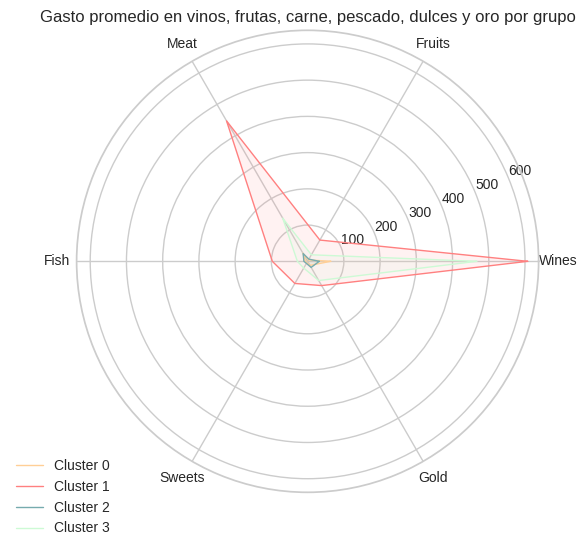

In [39]:
from math import pi

# Supongamos que 'scaled_ds' es tu DataFrame escalado y contiene una columna 'Clusters'.
# Asegúrate de que 'scaled_ds' esté correctamente definido.

# Definir los atributos a visualizar
attributes = ['Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold']

# Calcular las medias de cada atributo por clúster
cluster_means = df_pruebas.groupby('Clusters')[attributes].mean().reset_index()

# Número de variables que estamos graficando
num_vars = len(attributes)

# Calcular el ángulo en el que se centrará cada barra
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]  # Completar el círculo

# Crear el gráfico de radar para cada clúster
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

for index, row in cluster_means.iterrows():
    values = row[attributes].values.flatten().tolist()
    values += values[:1]  # Completar el círculo
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=f'Cluster {int(row["Clusters"])}')
    ax.fill(angles, values, alpha=0.1)

# Etiquetas para cada atributo
ax.set_xticks(angles[:-1])
ax.set_xticklabels(attributes)

# Añadir leyenda y título
plt.title('Gasto promedio en vinos, frutas, carne, pescado, dulces y oro por grupo')
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.show()

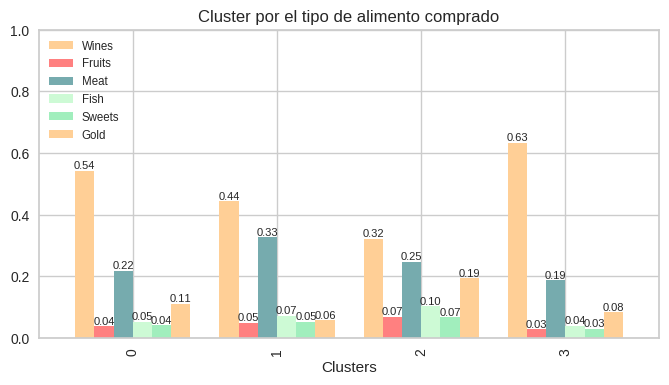

In [89]:
places = ("Wines Fruits Meat Fish Sweets Gold".split())

by_place_of_purchase = df_pruebas.groupby("Clusters")[places].sum()
by_place_of_purchase = by_place_of_purchase.apply(lambda x: x / np.sum(x), axis=1)

ax = plt.axes()
by_place_of_purchase.plot(kind="bar", figsize=(8, 4), ax=ax, width=0.8, ylim=(0, 1))
ax.legend(fontsize=8.3, loc=2)
for i in ax.containers:
    plt.bar_label(i, fmt="%.2f", fontsize=8)
ax.set_title("Cluster por el tipo de alimento comprado")
plt.show()

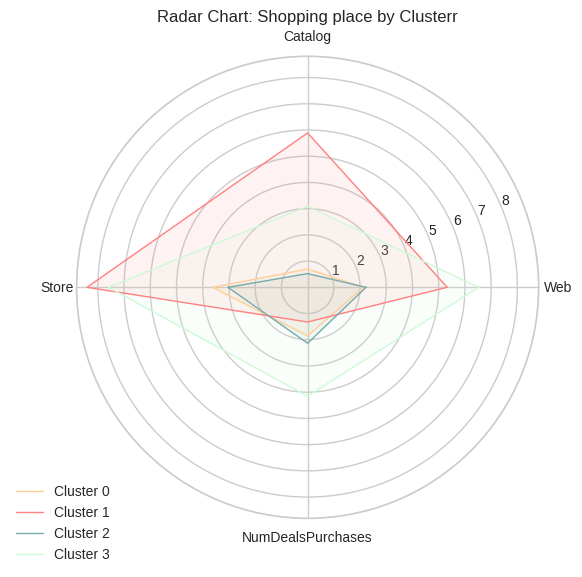

In [41]:
from math import pi
attributes = ['Web', 'Catalog', 'Store', 'NumDealsPurchases']
cluster_means = df_pruebas.groupby('Clusters')[attributes].mean().reset_index()

# Number of variables we're plotting.
num_vars = len(attributes)

# Compute angle each bar is centered on:
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]  # Complete the loop

# Create a radar chart for each cluster
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

for index, row in cluster_means.iterrows():
    values = row[attributes].values.flatten().tolist()
    values += values[:1]  # Complete the loop
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=f'Cluster {int(row["Clusters"])}')
    ax.fill(angles, values, alpha=0.1)

# Labels for each attribute.
ax.set_xticks(angles[:-1])
ax.set_xticklabels(attributes)

# Add legend and title
plt.title('Radar Chart: Shopping place by Clusterr')
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.show()

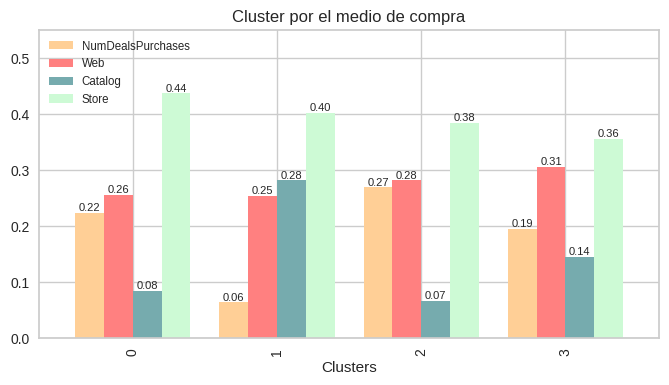

In [90]:
places = ("NumDealsPurchases Web Catalog Store".split())

by_place_of_purchase = df_pruebas.groupby("Clusters")[places].sum()
by_place_of_purchase = by_place_of_purchase.apply(lambda x: x / np.sum(x), axis=1)

ax = plt.axes()
by_place_of_purchase.plot(kind="bar", figsize=(8, 4), ax=ax, width=0.8, ylim=(0, 0.55))
ax.legend(fontsize=8.3, loc=2)
for i in ax.containers:
    plt.bar_label(i, fmt="%.2f", fontsize=8)
ax.set_title("Cluster por el medio de compra")
plt.show()

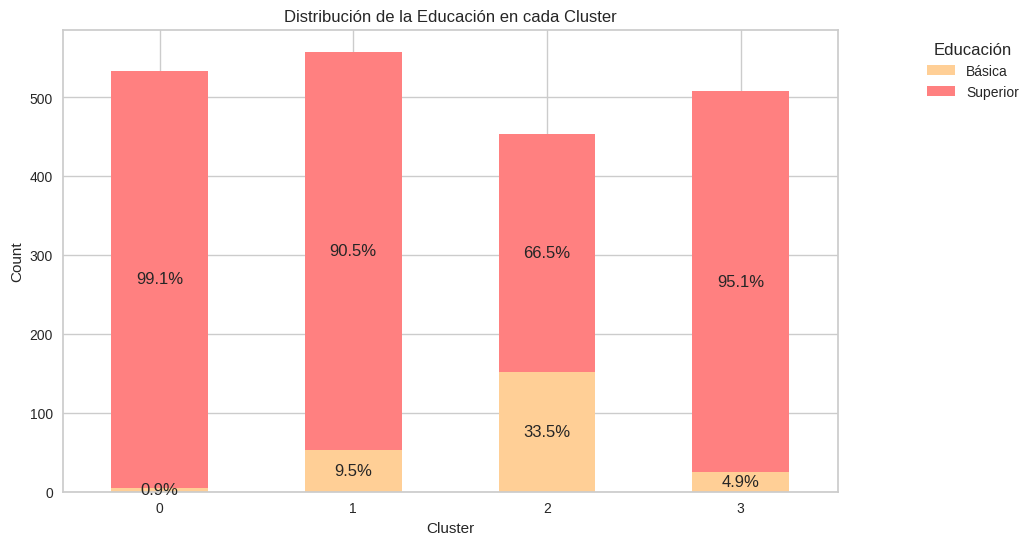

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Agrupar por 'Clusters' y contar los valores de 'Education'
education_counts = df.groupby(['Clusters', 'Education']).size().unstack()

# Crear el gráfico de barras
ax = education_counts.plot(kind='bar', stacked=True, figsize=(10, 6))

# Obtener el total de cada grupo de 'Clusters'
totals = education_counts.sum(axis=1)

# Agregar etiquetas con porcentajes dentro de cada color de la barra
for container in ax.containers:
    # Calcular el total de la barra
    total_height = sum(patch.get_height() for patch in container)
    # Agregar el porcentaje como etiquetas dentro de cada color
    for patch, total in zip(container, totals):
        height = patch.get_height()
        ax.text(patch.get_x() + patch.get_width() / 2, patch.get_y() + height / 2, f'{height / total:.1%}', ha='center', va='center')

# Añadir etiquetas y título
plt.title('Distribución de la Educación en cada Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotar las etiquetas del eje x para una mejor legibilidad

# Mostrar el gráfico
# Ajustar la posición de la leyenda
plt.legend(title='Educación', labels=['Básica', 'Superior'], loc='upper right', bbox_to_anchor=(1.25, 1), ncol=1)
plt.show()


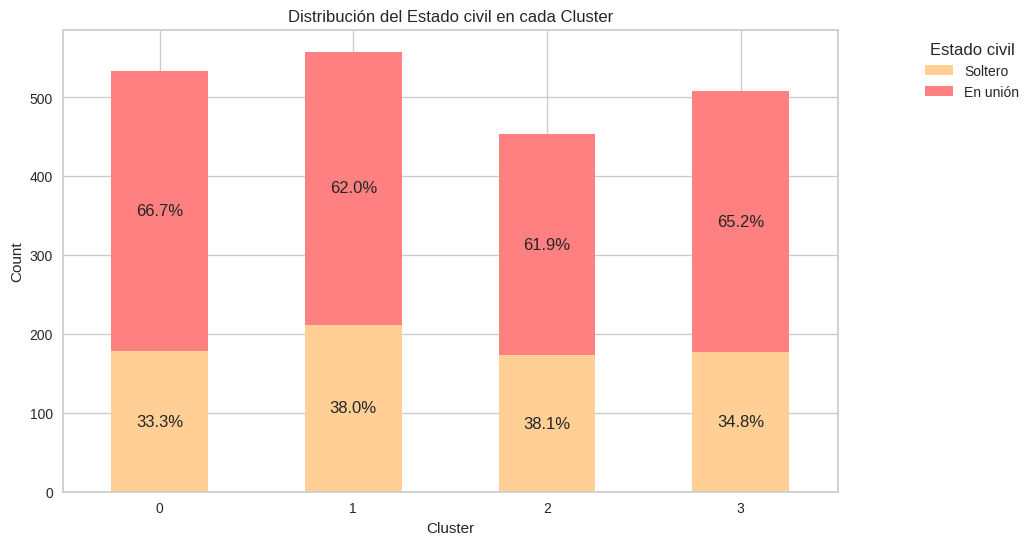

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# Agrupar por 'Clusters' y contar los valores de 'Education'
education_counts = df.groupby(['Clusters', 'Marital_Status']).size().unstack()

# Crear el gráfico de barras
ax = education_counts.plot(kind='bar', stacked=True, figsize=(10, 6))

# Obtener el total de cada grupo de 'Clusters'
totals = education_counts.sum(axis=1)

# Agregar etiquetas con porcentajes dentro de cada color de la barra
for container in ax.containers:
    # Calcular el total de la barra
    total_height = sum(patch.get_height() for patch in container)
    # Agregar el porcentaje como etiquetas dentro de cada color
    for patch, total in zip(container, totals):
        height = patch.get_height()
        ax.text(patch.get_x() + patch.get_width() / 2, patch.get_y() + height / 2, f'{height / total:.1%}', ha='center', va='center')

# Añadir etiquetas y título
plt.title('Distribución del Estado civil en cada Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotar las etiquetas del eje x para una mejor legibilidad

# Mostrar el gráfico
# Ajustar la posición de la leyenda
plt.legend(title='Estado civil', labels=['Soltero', 'En unión'], loc='upper right', bbox_to_anchor=(1.25, 1), ncol=1)
plt.show()

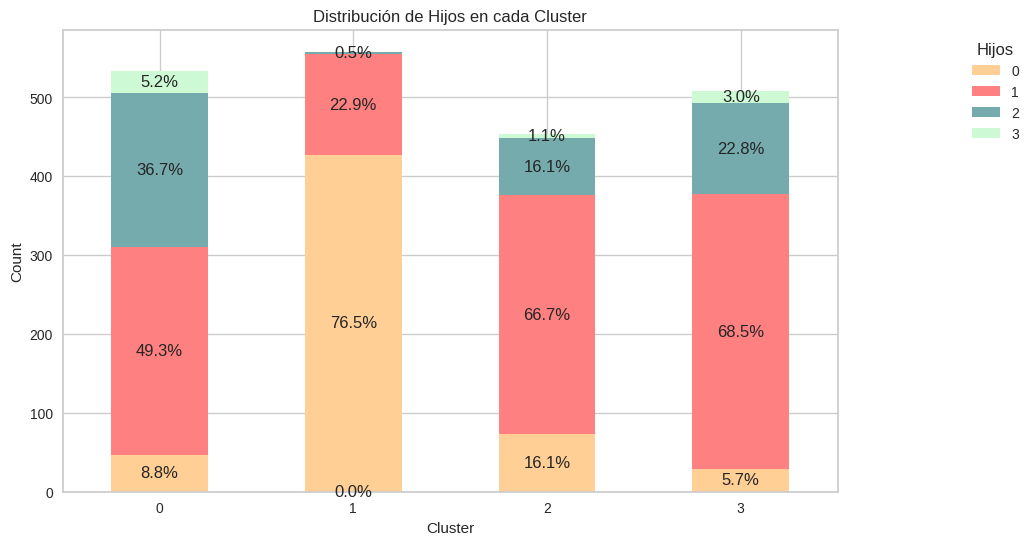

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# Agrupar por 'Clusters' y contar los valores de 'Education'
education_counts = df.groupby(['Clusters', 'Kids']).size().unstack()

# Crear el gráfico de barras
ax = education_counts.plot(kind='bar', stacked=True, figsize=(10, 6))

# Obtener el total de cada grupo de 'Clusters'
totals = education_counts.sum(axis=1)

# Agregar etiquetas con porcentajes dentro de cada color de la barra
for container in ax.containers:
    # Calcular el total de la barra
    total_height = sum(patch.get_height() for patch in container)
    # Agregar el porcentaje como etiquetas dentro de cada color
    for patch, total in zip(container, totals):
        height = patch.get_height()
        ax.text(patch.get_x() + patch.get_width() / 2, patch.get_y() + height / 2, f'{height / total:.1%}', ha='center', va='center')

# Añadir etiquetas y título
plt.title('Distribución de Hijos en cada Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotar las etiquetas del eje x para una mejor legibilidad

# Mostrar el gráfico
# Ajustar la posición de la leyenda
plt.legend(title='Hijos', labels=['0', '1', '2', '3'], loc='upper right', bbox_to_anchor=(1.25, 1), ncol=1)
plt.show()

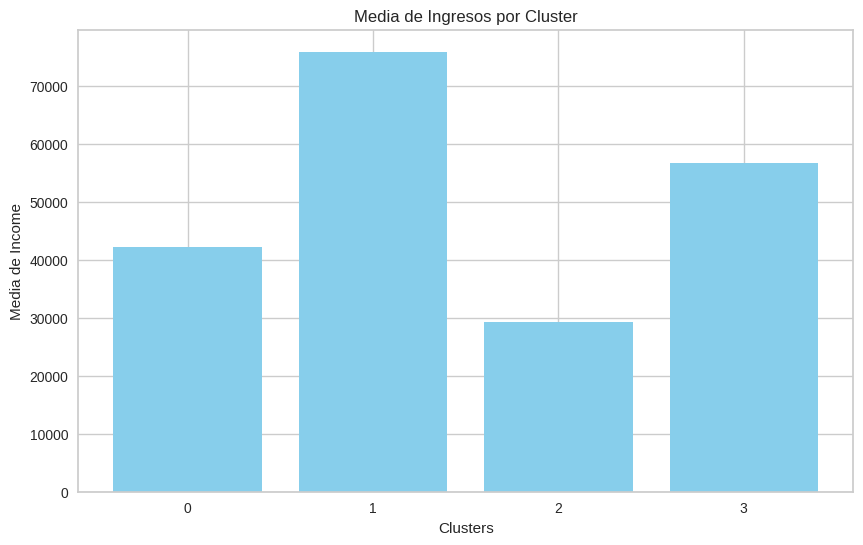

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# Calcular la media del ingreso por cada cluster
income_means = df_pruebas.groupby('Clusters')['Income'].mean().reset_index()

# Crear el gráfico de barras o de puntos
plt.figure(figsize=(10, 6))
plt.bar(income_means['Clusters'], income_means['Income'], color='skyblue')
plt.xlabel('Clusters')
plt.ylabel('Media de Income')
plt.title('Media de Ingresos por Cluster')

# Establecer las ubicaciones y etiquetas de las barras en el eje x
plt.xticks([0, 1, 2, 3], ['0', '1', '2', '3'])

# Mostrar el gráfico
plt.show()

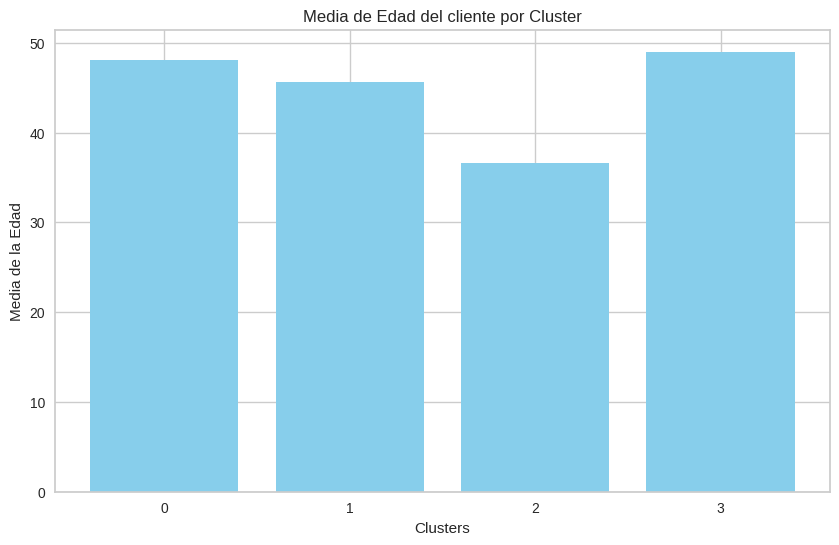

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# Calcular la media del ingreso por cada cluster
income_means = df_pruebas.groupby('Clusters')['Age'].mean().reset_index()

# Crear el gráfico de barras o de puntos
plt.figure(figsize=(10, 6))
plt.bar(income_means['Clusters'], income_means['Age'], color='skyblue')
plt.xlabel('Clusters')
plt.ylabel('Media de la Edad')
plt.title('Media de Edad del cliente por Cluster')

# Establecer las ubicaciones y etiquetas de las barras en el eje x
plt.xticks([0, 1, 2, 3], ['0', '1', '2', '3'])

# Mostrar el gráfico
plt.show()

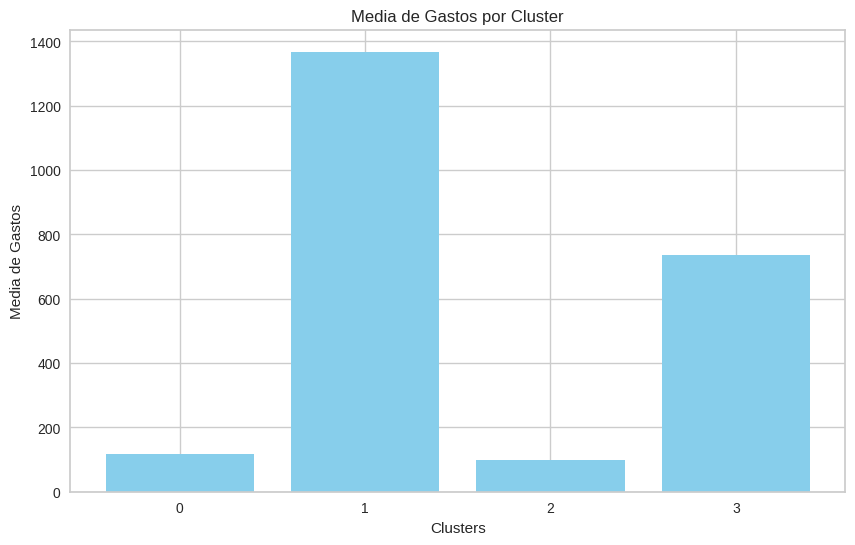

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# Calcular la media del ingreso por cada cluster
income_means = df_pruebas.groupby('Clusters')['Expenses'].mean().reset_index()

# Crear el gráfico de barras o de puntos
plt.figure(figsize=(10, 6))
plt.bar(income_means['Clusters'], income_means['Expenses'], color='skyblue')
plt.xlabel('Clusters')
plt.ylabel('Media de Gastos')
plt.title('Media de Gastos por Cluster')

# Establecer las ubicaciones y etiquetas de las barras en el eje x
plt.xticks([0, 1, 2, 3], ['0', '1', '2', '3'])

# Mostrar el gráfico
plt.show()

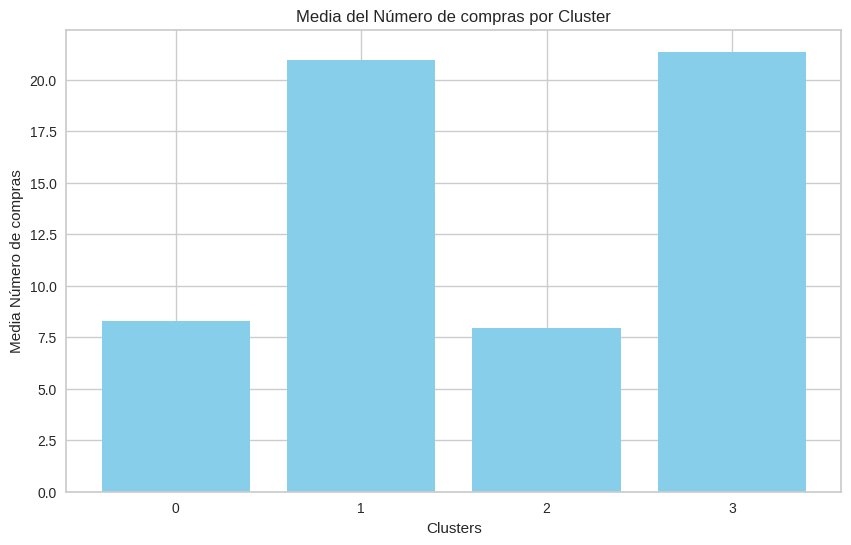

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

# Calcular la media del ingreso por cada cluster
income_means = df_pruebas.groupby('Clusters')['NumTotalPurchases'].mean().reset_index()

# Crear el gráfico de barras o de puntos
plt.figure(figsize=(10, 6))
plt.bar(income_means['Clusters'], income_means['NumTotalPurchases'], color='skyblue')
plt.xlabel('Clusters')
plt.ylabel('Media Número de compras')
plt.title('Media del Número de compras por Cluster')

# Establecer las ubicaciones y etiquetas de las barras en el eje x
plt.xticks([0, 1, 2, 3], ['0', '1', '2', '3'])

# Mostrar el gráfico
plt.show()

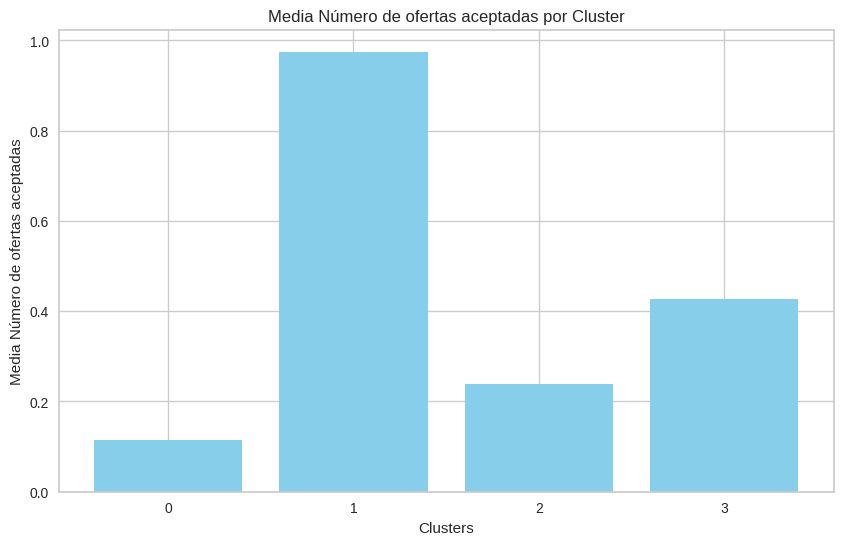

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# Calcular la media del ingreso por cada cluster
income_means = df_pruebas.groupby('Clusters')['TotalAcceptedCmp'].mean().reset_index()

# Crear el gráfico de barras o de puntos
plt.figure(figsize=(10, 6))
plt.bar(income_means['Clusters'], income_means['TotalAcceptedCmp'], color='skyblue')
plt.xlabel('Clusters')
plt.ylabel('Media Número de ofertas aceptadas')
plt.title('Media Número de ofertas aceptadas por Cluster')

# Establecer las ubicaciones y etiquetas de las barras en el eje x
plt.xticks([0, 1, 2, 3], ['0', '1', '2', '3'])

# Mostrar el gráfico
plt.show()

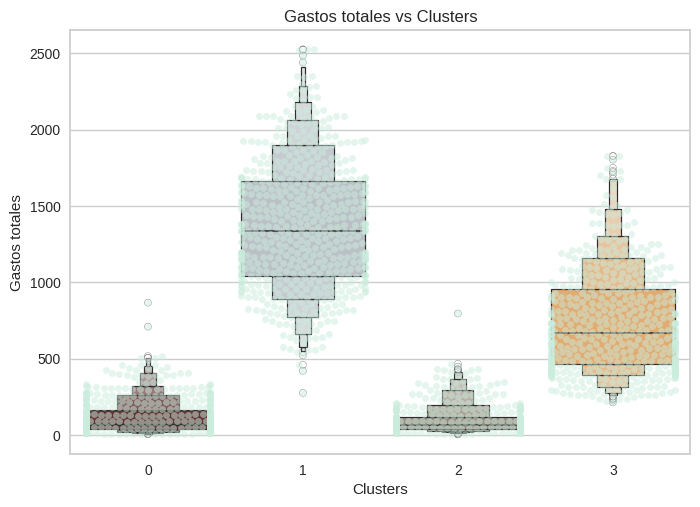

In [39]:
plt.figure()
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl=sns.swarmplot(x=df_pruebas["Clusters"], y=df_pruebas["Expenses"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=df_pruebas["Clusters"], y=df_pruebas["Expenses"], palette=pal)

# Set the title and labels
plt.title('Gastos totales vs Clusters')
plt.xlabel('Clusters')
plt.ylabel('Gastos totales')
plt.show()

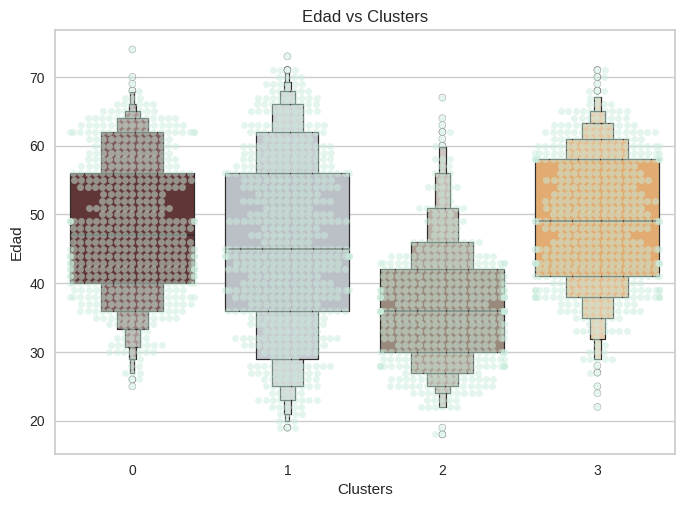

In [40]:
plt.figure()
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl=sns.swarmplot(x=df_pruebas["Clusters"], y=df_pruebas["Age"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=df_pruebas["Clusters"], y=df_pruebas["Age"], palette=pal)

# Set the title and labels
plt.title('Edad vs Clusters')
plt.xlabel('Clusters')
plt.ylabel('Edad')
plt.show()

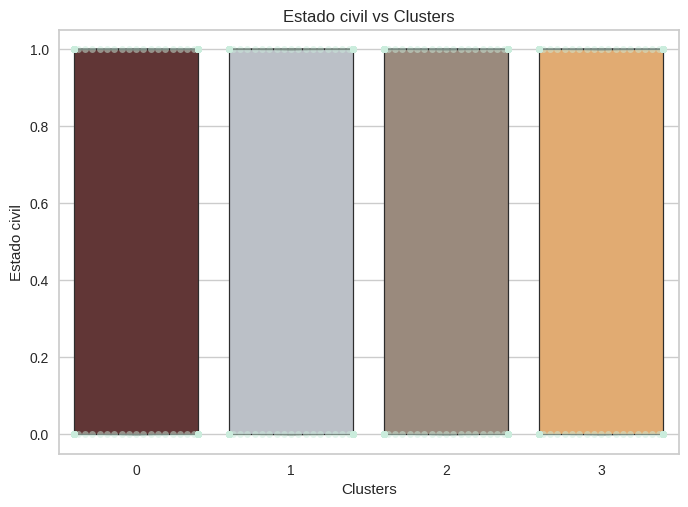

In [41]:
plt.figure()
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl=sns.swarmplot(x=df_pruebas["Clusters"], y=df_pruebas["Marital_Status"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=df_pruebas["Clusters"], y=df_pruebas["Marital_Status"], palette=pal)

# Set the title and labels
plt.title('Estado civil vs Clusters')
plt.xlabel('Clusters')
plt.ylabel('Estado civil')
plt.show()

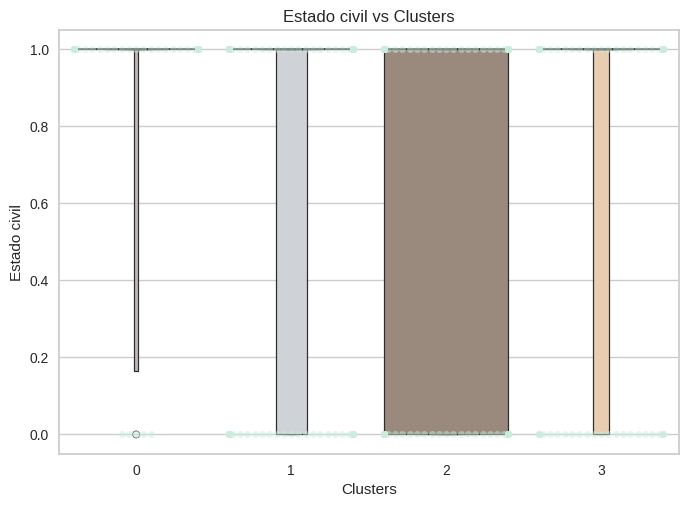

In [42]:
plt.figure()
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl=sns.swarmplot(x=df_pruebas["Clusters"], y=df_pruebas["Education"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=df_pruebas["Clusters"], y=df_pruebas["Education"], palette=pal)

# Set the title and labels
plt.title('Estado civil vs Clusters')
plt.xlabel('Clusters')
plt.ylabel('Estado civil')
plt.show()

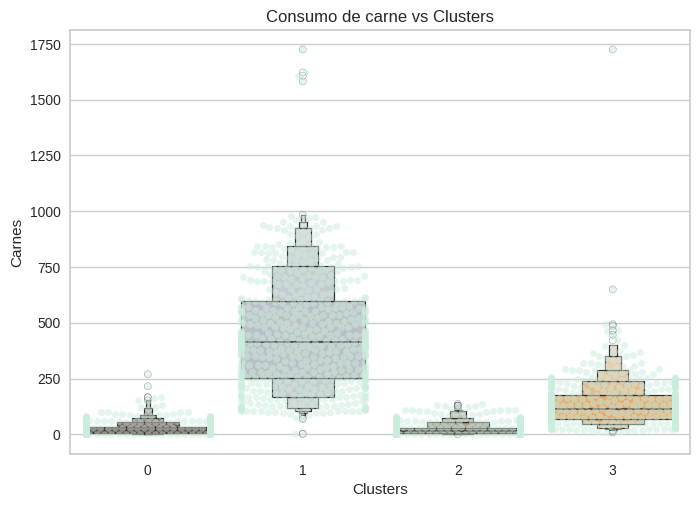

In [43]:
plt.figure()
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl=sns.swarmplot(x=df_pruebas["Clusters"], y=df_pruebas["Meat"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=df_pruebas["Clusters"], y=df_pruebas["Meat"], palette=pal)

# Set the title and labels
plt.title('Consumo de carne vs Clusters')
plt.xlabel('Clusters')
plt.ylabel('Carnes')
plt.show()

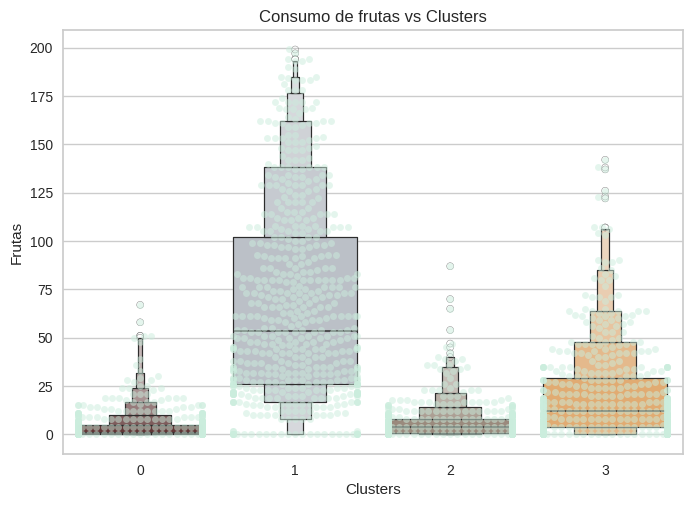

In [44]:
plt.figure()
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl=sns.swarmplot(x=df_pruebas["Clusters"], y=df_pruebas["Fruits"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=df_pruebas["Clusters"], y=df_pruebas["Fruits"], palette=pal)

# Set the title and labels
plt.title('Consumo de frutas vs Clusters')
plt.xlabel('Clusters')
plt.ylabel('Frutas')
plt.show()

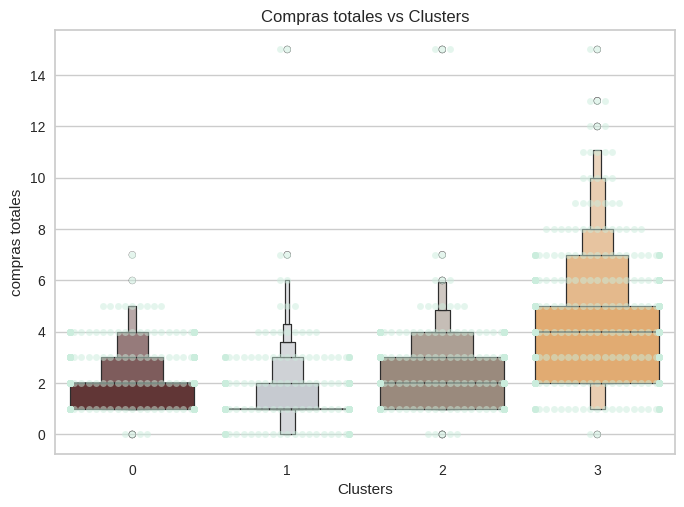

In [45]:
plt.figure()
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl=sns.swarmplot(x=df_pruebas["Clusters"], y=df_pruebas["NumDealsPurchases"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=df_pruebas["Clusters"], y=df_pruebas["NumDealsPurchases"], palette=pal)

# Set the title and labels
plt.title('Compras totales vs Clusters')
plt.xlabel('Clusters')
plt.ylabel('compras totales')
plt.show()

#Método Apriori

Aquí definiré tres segmentos de clientes según la edad, ingresos y antigüedad:

In [91]:
#Crear segmento de edad
cut_labels_Age = ['Young', 'Adult', 'Mature', 'Senior']
cut_bins = [0, 30, 45, 65, 120]
df_pruebas['Age_group'] = pd.cut(df_pruebas['Age'], bins=cut_bins, labels=cut_labels_Age)

#Crear segmento de ingresos
cut_labels_Income = ['Low income', 'Low to medium income', 'Medium to high income', 'High income']
df_pruebas['Income_group'] = pd.qcut(df_pruebas['Income'], q=4, labels=cut_labels_Income)

#Create segmento de antiguedad
cut_labels_Seniority = ['New customers', 'Discovering customers', 'Experienced customers', 'Old customers']
df_pruebas['Seniority_group'] = pd.qcut(df_pruebas['CustomerAge'], q=4, labels=cut_labels_Seniority)
data=df_pruebas.drop(columns=['Age','Income','CustomerAge'])

Ahora definiré nuevos segmentos según el gasto de los clientes en cada producto los cuales se basarán en:

* No comprador
* Comprador bajo
* Comprador frecuente
* Mayor comprador

In [93]:
cut_labels = ['Low consumer', 'Frequent consumer', 'Biggest consumer']
df_pruebas['Wines_segment'] = pd.qcut(df_pruebas['Wines'][df_pruebas['Wines']>0],q=[0, .25, .75, 1], labels=cut_labels).astype("object")
df_pruebas['Fruits_segment'] = pd.qcut(df_pruebas['Fruits'][df_pruebas['Fruits']>0],q=[0, .25, .75, 1], labels=cut_labels).astype("object")
df_pruebas['Meat_segment'] = pd.qcut(df_pruebas['Meat'][df_pruebas['Meat']>0],q=[0, .25, .75, 1], labels=cut_labels).astype("object")
df_pruebas['Fish_segment'] = pd.qcut(df_pruebas['Fish'][df_pruebas['Fish']>0],q=[0, .25, .75, 1], labels=cut_labels).astype("object")
df_pruebas['Sweets_segment'] = pd.qcut(df_pruebas['Sweets'][df_pruebas['Sweets']>0],q=[0, .25, .75, 1], labels=cut_labels).astype("object")
df_pruebas['Gold_segment'] = pd.qcut(df_pruebas['Gold'][df_pruebas['Gold']>0],q=[0, .25, .75, 1], labels=cut_labels).astype("object")
df_pruebas.replace(np.nan, "Non consumer",inplace=True)
df_pruebas.drop(columns=['Expenses','Wines','Fruits','Meat','Fish','Sweets','Gold'],inplace=True)
df_pruebas = df_pruebas.astype(object)

Aquí utilizaré el algoritmo Apriori para la tarea de análisis de la personalidad del cliente con Python. Aquí utilizaré este algoritmo para identificar al mayor cliente de vinos:

In [96]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', 999)
pd.options.display.float_format = "{:.3f}".format

association=df_pruebas.copy()
df = pd.get_dummies(association)
min_support = 0.08
max_len = 10
frequent_items = apriori(df, use_colnames=True, min_support=min_support, max_len=max_len + 1)
rules = association_rules(frequent_items, metric='lift', min_threshold=1)

product='Wines'
segment='Biggest consumer'
target = '{\'%s_segment_%s\'}' %(product,segment)
results_personnal_care = rules[rules['consequents'].astype(str).str.contains(target, na=False)].sort_values(by='confidence', ascending=False)
results_personnal_care.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
48775,"(Income_group_High income, Complain_0, Education_1, Meat_segment_Biggest consumer)",(Wines_segment_Biggest consumer),0.175,0.248,0.113,0.646,2.603,0.070,2.125,0.746
19808,"(Income_group_High income, Education_1, Meat_segment_Biggest consumer)",(Wines_segment_Biggest consumer),0.175,0.248,0.113,0.644,2.595,0.069,2.114,0.745
52053,"(Income_group_High income, Clusters_1, Education_1, Meat_segment_Biggest consumer)",(Wines_segment_Biggest consumer),0.164,0.248,0.105,0.640,2.577,0.064,2.087,0.732
75781,"(Clusters_1, Complain_0, Education_1, Income_group_High income, Meat_segment_Biggest consumer)",(Wines_segment_Biggest consumer),0.164,0.248,0.105,0.640,2.577,0.064,2.087,0.732
31425,"(Income_group_High income, Complain_0, Meat_segment_Biggest consumer)",(Wines_segment_Biggest consumer),0.187,0.248,0.119,0.638,2.570,0.073,2.077,0.751


Utilizaré este algoritmo para identificar al mayor cliente de carnes

In [97]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', 999)
pd.options.display.float_format = "{:.3f}".format

association=df_pruebas.copy()
df = pd.get_dummies(association)
min_support = 0.08
max_len = 10
frequent_items = apriori(df, use_colnames=True, min_support=min_support, max_len=max_len + 1)
rules = association_rules(frequent_items, metric='lift', min_threshold=1)

product='Meat'
segment='Biggest consumer'
target = '{\'%s_segment_%s\'}' %(product,segment)
results_personnal_care = rules[rules['consequents'].astype(str).str.contains(target, na=False)].sort_values(by='confidence', ascending=False)
results_personnal_care.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
58022,"(Income_group_High income, Kids_0, Wines_segment_Biggest consumer, NumDealsPurchases_1)",(Meat_segment_Biggest consumer),0.093,0.248,0.084,0.896,3.608,0.061,7.216,0.797
78994,"(Clusters_1, Kids_0, NumDealsPurchases_1, Income_group_High income, Wines_segment_Biggest consumer)",(Meat_segment_Biggest consumer),0.093,0.248,0.084,0.896,3.608,0.061,7.216,0.797
83012,"(Clusters_1, Complain_0, Kids_0, NumDealsPurchases_1, Income_group_High income, Wines_segment_Biggest consumer)",(Meat_segment_Biggest consumer),0.093,0.248,0.083,0.895,3.606,0.060,7.179,0.797
78684,"(Complain_0, Kids_0, NumDealsPurchases_1, Income_group_High income, Wines_segment_Biggest consumer)",(Meat_segment_Biggest consumer),0.093,0.248,0.083,0.895,3.606,0.060,7.179,0.797
57962,"(Clusters_1, Fish_segment_Biggest consumer, Kids_0, NumDealsPurchases_1)",(Meat_segment_Biggest consumer),0.104,0.248,0.093,0.893,3.595,0.067,6.994,0.806


Utilizaré este algoritmo para identificar al mayor cliente de frutas

In [99]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', 999)
pd.options.display.float_format = "{:.3f}".format

association=df_pruebas.copy()
df = pd.get_dummies(association)
min_support = 0.08
max_len = 10
frequent_items = apriori(df, use_colnames=True, min_support=min_support, max_len=max_len + 1)
rules = association_rules(frequent_items, metric='lift', min_threshold=1)

product='Fruits'
segment='Biggest consumer'
target = '{\'%s_segment_%s\'}' %(product,segment)
results_personnal_care = rules[rules['consequents'].astype(str).str.contains(target, na=False)].sort_values(by='confidence', ascending=False)
results_personnal_care.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
33875,"(Clusters_1, Fish_segment_Biggest consumer, Meat_segment_Biggest consumer)",(Fruits_segment_Biggest consumer),0.132,0.201,0.086,0.649,3.230,0.059,2.279,0.795
63207,"(Clusters_1, Fish_segment_Biggest consumer, Complain_0, Meat_segment_Biggest consumer)",(Fruits_segment_Biggest consumer),0.132,0.201,0.086,0.649,3.230,0.059,2.279,0.795
19207,"(Clusters_1, Fish_segment_Biggest consumer, Education_1)",(Fruits_segment_Biggest consumer),0.150,0.201,0.097,0.649,3.229,0.067,2.278,0.812
47550,"(Clusters_1, Fish_segment_Biggest consumer, Education_1, Complain_0)",(Fruits_segment_Biggest consumer),0.149,0.201,0.097,0.648,3.224,0.067,2.271,0.811
9488,"(Fish_segment_Biggest consumer, Sweets_segment_Biggest consumer)",(Fruits_segment_Biggest consumer),0.126,0.201,0.081,0.647,3.219,0.056,2.265,0.788


# Clasificador Random Forest

Utilizar un clasificador de Bosque Aleatorio (Random Forest Classifier) para predecir los clusters de un conjunto de datos

Random Forest Classifier Accuracy: 0.91

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.92      0.89        97
           1       0.97      0.92      0.94       132
           2       0.98      0.87      0.92        97
           3       0.82      0.94      0.88        85

    accuracy                           0.91       411
   macro avg       0.91      0.91      0.91       411
weighted avg       0.92      0.91      0.91       411



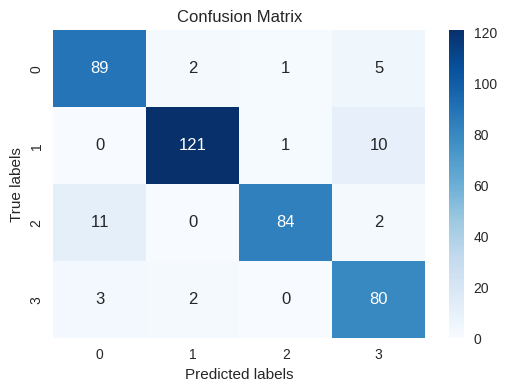

In [46]:
# Suponiendo que la última columna es la variable de destino y el resto son características
X = df_pruebas.drop(columns=['Clusters'])
y = df_pruebas['Clusters']

#Dividir el dataset en tres diferentes dataset el conjunto de 60% entrenamiento, 20% prueba y 20% validación

# Primero dividimos 20% en prueba y 80%  en (entrenamiento y validación)
resto , X_test , resto_clase , y_test = train_test_split(X, y, test_size= 0.20, random_state=42)

# Segundo el 80% del resto se divide en 60% entrenamiento y 20% validacion que en este caso es 25% por regla de 3
X_train , X_val , y_train , y_val = train_test_split(resto, resto_clase, test_size= 0.25, random_state=42)

# Dividir los datos en conjuntos de entrenamiento y prueba.
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialize the Random Forest Classifier
forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
forest_classifier.fit(X_train, y_train)

# Make predictions on the new data
y_pred = forest_classifier.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

# Display the results
print(f"Random Forest Classifier Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report_str)

# Plot confusion matrix as an image
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()

In [47]:
X_train.shape

(1232, 22)

In [48]:
X_test.shape

(411, 22)

In [49]:
X_val.shape

(411, 22)

# Clasificador K Neighbors

K Neighbors Classifier Accuracy: 0.73

Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.67      0.63        97
           1       0.91      0.83      0.87       132
           2       0.69      0.67      0.68        97
           3       0.69      0.69      0.69        85

    accuracy                           0.73       411
   macro avg       0.72      0.72      0.72       411
weighted avg       0.74      0.73      0.73       411



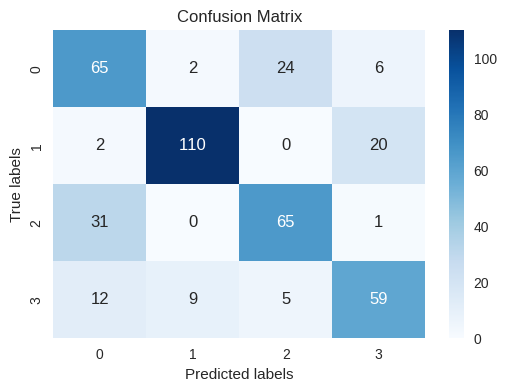

In [50]:
# Initialize the KNeighborsClassifier
knn_classifier = KNeighborsClassifier()

# Train the classifier on the training data
knn_classifier.fit(X_train, y_train)

# Make predictions on the new data
y_pred = knn_classifier.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

# Display the results
print(f"K Neighbors Classifier Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report_str)

# Plot confusion matrix as an image
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()

# Clasificador Decision Tree

Decision Tree Classifier:
Accuracy: 0.82
              precision    recall  f1-score   support

           0       0.79      0.80      0.80        97
           1       0.88      0.87      0.87       132
           2       0.86      0.84      0.85        97
           3       0.75      0.76      0.76        85

    accuracy                           0.82       411
   macro avg       0.82      0.82      0.82       411
weighted avg       0.83      0.82      0.83       411



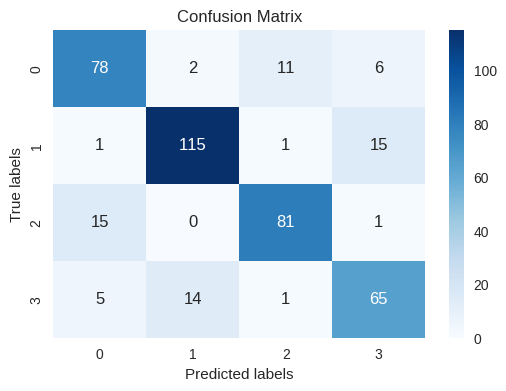

In [51]:
# Initialize the Decision Tree classifier
dt_classifier = DecisionTreeClassifier()

# Train the classifier
dt_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred_dt = dt_classifier.predict(X_test)

# Evaluate the performance of the classifier
accuracy = dt_classifier.score(X_test, y_test)

# Generate classification report
classification_report_str = classification_report(y_test, y_pred_dt)

print("Decision Tree Classifier:")
print(f"Accuracy: {accuracy:.2f}")
print(classification_report_str)

# Plot confusion matrix as an image
confusion_mat = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()

# XGBoost (Extreme Gradient Boosting):

XGBoost Classifier Accuracy: 0.93

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.95      0.92        97
           1       0.96      0.92      0.94       132
           2       1.00      0.90      0.95        97
           3       0.84      0.94      0.89        85

    accuracy                           0.93       411
   macro avg       0.93      0.93      0.93       411
weighted avg       0.93      0.93      0.93       411



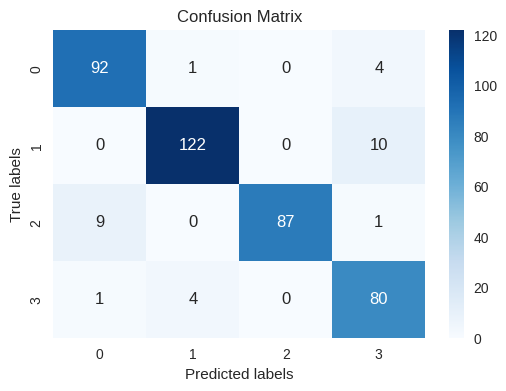

In [52]:
# Inicializar el clasificador XGBoost
xgb_classifier = XGBClassifier()

# Entrenar el clasificador en los datos de entrenamiento
xgb_classifier.fit(X_train, y_train)

# Realizar predicciones en los datos de prueba
y_pred = xgb_classifier.predict(X_test)

# Evaluar el rendimiento del clasificador
accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

# Mostrar los resultados
print(f"XGBoost Classifier Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report_str)

# Mostrar la matriz de confusión como un gráfico de calor
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()

# AdaBoost (Adaptive Boosting)

AdaBoost Classifier Accuracy: 0.67

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.09      0.17        97
           1       0.78      0.94      0.85       132
           2       0.54      0.97      0.69        97
           3       0.75      0.56      0.64        85

    accuracy                           0.67       411
   macro avg       0.70      0.64      0.59       411
weighted avg       0.71      0.67      0.61       411



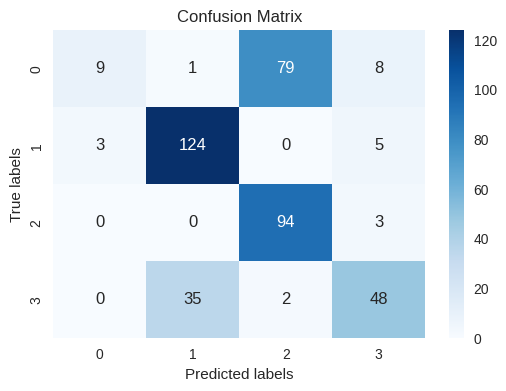

In [53]:
# Inicializar el clasificador AdaBoost
adaboost_classifier = AdaBoostClassifier()

# Entrenar el clasificador en los datos de entrenamiento
adaboost_classifier.fit(X_train, y_train)

# Realizar predicciones en los datos de prueba
y_pred = adaboost_classifier.predict(X_test)

# Evaluar el rendimiento del clasificador
accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

# Mostrar los resultados
print(f"AdaBoost Classifier Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report_str)

# Mostrar la matriz de confusión como un gráfico de calor
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()

# Gradient Boosting Machine (GBM)

GBM Classifier Accuracy: 0.92

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        97
           1       0.97      0.93      0.95       132
           2       0.98      0.90      0.94        97
           3       0.86      0.93      0.89        85

    accuracy                           0.92       411
   macro avg       0.92      0.92      0.92       411
weighted avg       0.93      0.92      0.92       411



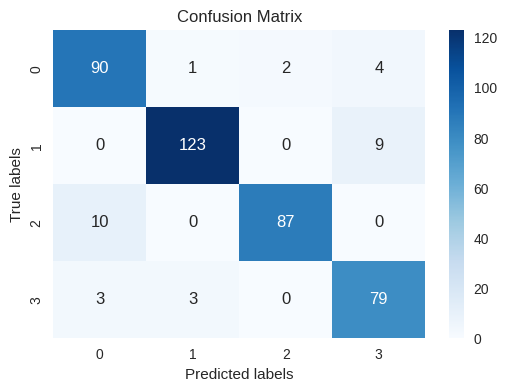

In [54]:
# Inicializar el clasificador GBM
gbm_classifier = GradientBoostingClassifier()

# Entrenar el clasificador en los datos de entrenamiento
gbm_classifier.fit(X_train, y_train)

# Realizar predicciones en los datos de prueba
y_pred = gbm_classifier.predict(X_test)

# Evaluar el rendimiento del clasificador
accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

# Mostrar los resultados
print(f"GBM Classifier Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report_str)

# Mostrar la matriz de confusión como un gráfico de calor
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()

# Support Vector Machine (SVM)

SVM Classifier Accuracy: 0.64

Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.54      0.49        97
           1       0.87      0.82      0.84       132
           2       0.74      0.54      0.62        97
           3       0.51      0.61      0.56        85

    accuracy                           0.64       411
   macro avg       0.64      0.63      0.63       411
weighted avg       0.67      0.64      0.65       411



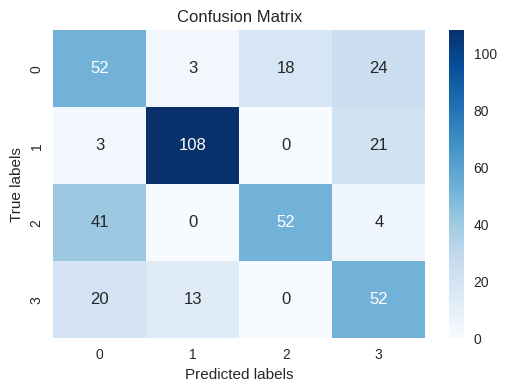

In [55]:
# Inicializar el clasificador SVM
svm_classifier = SVC()

# Entrenar el clasificador en los datos de entrenamiento
svm_classifier.fit(X_train, y_train)

# Realizar predicciones en los datos de prueba
y_pred = svm_classifier.predict(X_test)

# Evaluar el rendimiento del clasificador
accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

# Mostrar los resultados
print(f"SVM Classifier Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report_str)

# Mostrar la matriz de confusión como un gráfico de calor
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()

# LightGBM

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001095 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1990
[LightGBM] [Info] Number of data points in the train set: 1232, number of used features: 21
[LightGBM] [Info] Start training from score -1.305253
[LightGBM] [Info] Start training from score -1.338742
[LightGBM] [Info] Start training from score -1.567318
[LightGBM] [Info] Start training from score -1.354343
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
LightGBM Accuracy: 0.94

Classification Report:
              precision    recall  f1-score   support

           0       0.91      

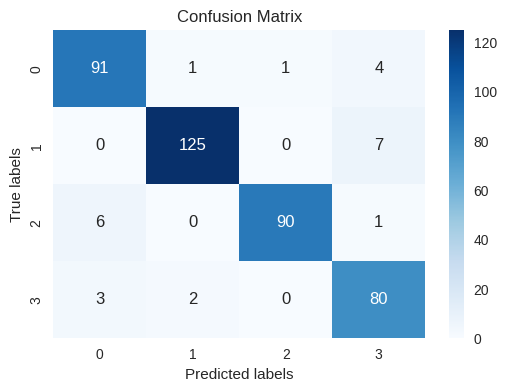

In [56]:
# Convertir el conjunto de datos al formato de LightGBM
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test)

# Parámetros del modelo
params = {
    'objective': 'multiclass',
    'num_class': len(y.unique()),
    'metric': 'multi_logloss'
}

# Entrenar el modelo
num_round = 100
bst = lgb.train(params, train_data, num_round)

# Realizar predicciones en los datos de prueba
y_pred = bst.predict(X_test, num_iteration=bst.best_iteration)

# Convertir las probabilidades en etiquetas predichas
y_pred_labels = [list(x).index(max(x)) for x in y_pred]

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred_labels)
classification_report_str = classification_report(y_test, y_pred_labels)
confusion_mat = confusion_matrix(y_test, y_pred_labels)

# Mostrar los resultados
print(f"LightGBM Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report_str)

# Mostrar la matriz de confusión como un gráfico de calor
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()

# CatBoost

CatBoost Classifier Accuracy: 0.92

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.93      0.91        97
           1       0.95      0.92      0.94       132
           2       0.98      0.91      0.94        97
           3       0.85      0.93      0.89        85

    accuracy                           0.92       411
   macro avg       0.92      0.92      0.92       411
weighted avg       0.92      0.92      0.92       411



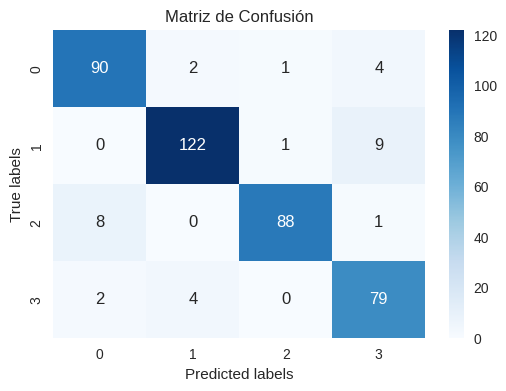

In [57]:
# Inicializar el clasificador CatBoost
catboost_classifier = CatBoostClassifier()

# Entrenar el clasificador en los datos de entrenamiento
catboost_classifier.fit(X_train, y_train, verbose=0)

# Realizar predicciones en los datos de prueba
y_pred = catboost_classifier.predict(X_test)

# Evaluar el rendimiento del clasificador
accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

# Mostrar los resultados
print(f"CatBoost Classifier Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report_str)

# Mostrar la matriz de confusión como un gráfico de calor
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()

#CNN

Epoch 1/50
31/31 [==============================] - 6s 21ms/step - loss: 1.2398 - accuracy: 0.4071 - val_loss: 0.9907 - val_accuracy: 0.6761
Epoch 2/50
31/31 [==============================] - 0s 9ms/step - loss: 0.8982 - accuracy: 0.6142 - val_loss: 0.7182 - val_accuracy: 0.6761
Epoch 3/50
31/31 [==============================] - 0s 7ms/step - loss: 0.7437 - accuracy: 0.6609 - val_loss: 0.5926 - val_accuracy: 0.7206
Epoch 4/50
31/31 [==============================] - 0s 8ms/step - loss: 0.6498 - accuracy: 0.7168 - val_loss: 0.5762 - val_accuracy: 0.7247
Epoch 5/50
31/31 [==============================] - 0s 8ms/step - loss: 0.6395 - accuracy: 0.7157 - val_loss: 0.5108 - val_accuracy: 0.8178
Epoch 6/50
31/31 [==============================] - 0s 9ms/step - loss: 0.6167 - accuracy: 0.7218 - val_loss: 0.4860 - val_accuracy: 0.8259
Epoch 7/50
31/31 [==============================] - 0s 8ms/step - loss: 0.5645 - accuracy: 0.7584 - val_loss: 0.4706 - val_accuracy: 0.8259
Epoch 8/50
31/31 [=

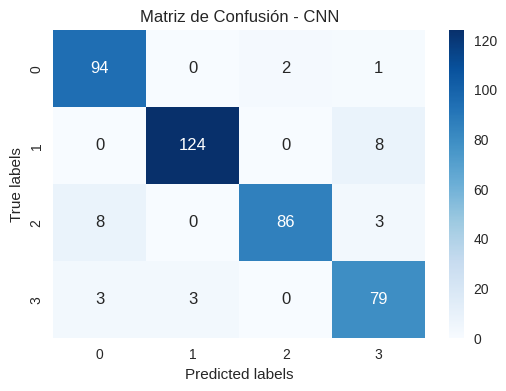

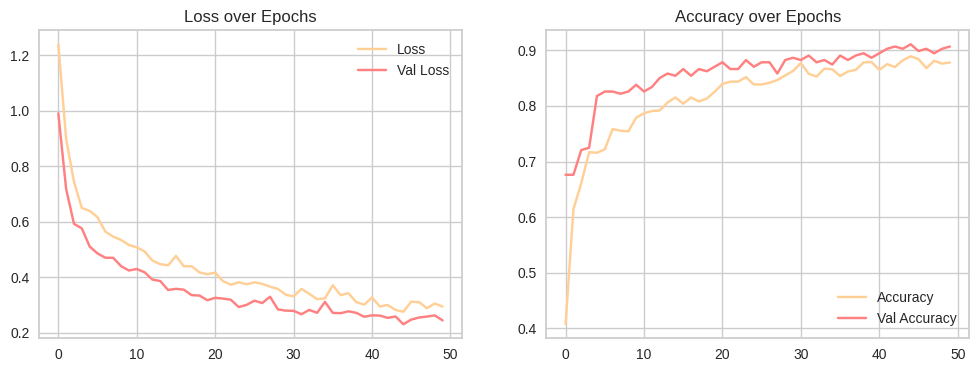

In [58]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que tus datos ya están cargados como X_train, X_test, y_train, y_test

# Normalizar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Añadimos una dimensión para que los datos sean compatibles con Conv1D
X_train_cnn = np.expand_dims(X_train, axis=2)
X_test_cnn = np.expand_dims(X_test, axis=2)

input_shape = X_train_cnn.shape[1:]  # Número de características y 1 canal
num_classes = len(np.unique(y_train))

# Inicializar el modelo CNN 1D
cnn_model = Sequential([
    Conv1D(32, kernel_size=3, activation='relu', input_shape=input_shape),
    MaxPooling1D(pool_size=2),
    Dropout(0.5),  # Añadir Dropout para regularización
    Conv1D(64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Dropout(0.5),  # Añadir Dropout para regularización
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Añadir Dropout para regularización
    Dense(num_classes, activation='softmax')
])

# Compilar el modelo
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history_cnn = cnn_model.fit(X_train_cnn, y_train, epochs=50, batch_size=32, verbose=1, validation_split=0.2)

# Realizar predicciones
y_pred_cnn = cnn_model.predict(X_test_cnn)
y_pred_cnn_classes = y_pred_cnn.argmax(axis=1)

# Evaluar el rendimiento
accuracy_cnn = accuracy_score(y_test, y_pred_cnn_classes)
classification_report_cnn = classification_report(y_test, y_pred_cnn_classes)
confusion_mat_cnn = confusion_matrix(y_test, y_pred_cnn_classes)

# Mostrar los resultados
print(f"CNN Classifier Accuracy: {accuracy_cnn:.2f}")
print("\nClassification Report:")
print(classification_report_cnn)

# Mostrar la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_mat_cnn, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión - CNN")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()

# Graficar la pérdida y la precisión
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_cnn.history['loss'], label='Loss')
plt.plot(history_cnn.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history_cnn.history['accuracy'], label='Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')

plt.show()

#Código para RNN (LSTM)

Epoch 1/50
31/31 [==============================] - 3s 29ms/step - loss: 1.0930 - accuracy: 0.4832 - val_loss: 0.8589 - val_accuracy: 0.5547
Epoch 2/50
31/31 [==============================] - 0s 10ms/step - loss: 0.8390 - accuracy: 0.5299 - val_loss: 0.7854 - val_accuracy: 0.6559
Epoch 3/50
31/31 [==============================] - 0s 10ms/step - loss: 0.7686 - accuracy: 0.5706 - val_loss: 0.7302 - val_accuracy: 0.6883
Epoch 4/50
31/31 [==============================] - 0s 9ms/step - loss: 0.7287 - accuracy: 0.6416 - val_loss: 0.7407 - val_accuracy: 0.5992
Epoch 5/50
31/31 [==============================] - 0s 9ms/step - loss: 0.7108 - accuracy: 0.6305 - val_loss: 0.7584 - val_accuracy: 0.5830
Epoch 6/50
31/31 [==============================] - 0s 9ms/step - loss: 0.6630 - accuracy: 0.6741 - val_loss: 0.6589 - val_accuracy: 0.7085
Epoch 7/50
31/31 [==============================] - 0s 9ms/step - loss: 0.6152 - accuracy: 0.6914 - val_loss: 0.6124 - val_accuracy: 0.7611
Epoch 8/50
31/31 

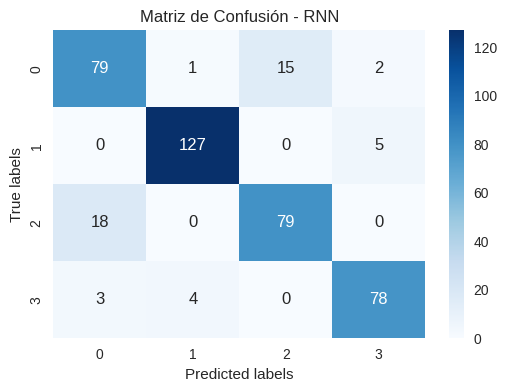

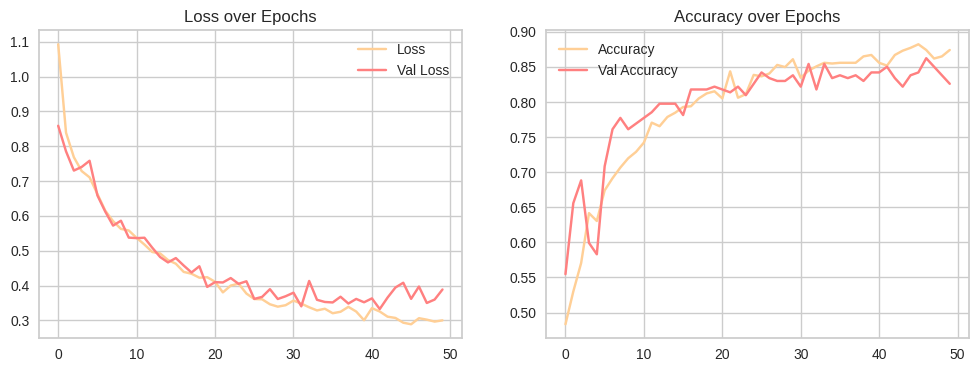

In [59]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que tus datos ya están cargados como X_train, X_test, y_train, y_test

# Normalizar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Añadimos una dimensión para que los datos sean compatibles con LSTM
X_train_rnn = np.expand_dims(X_train, axis=2)
X_test_rnn = np.expand_dims(X_test, axis=2)

timesteps = X_train_rnn.shape[1]  # Número de características
input_dim = X_train_rnn.shape[2]  # Dimensión de características (1 en este caso)
num_classes = len(np.unique(y_train))

# Inicializar el modelo RNN
rnn_model = Sequential([
    LSTM(100, input_shape=(timesteps, input_dim)),
    Dropout(0.5),  # Añadir Dropout para regularización
    Dense(128, activation='relu'),
    Dropout(0.5),  # Añadir Dropout para regularización
    Dense(num_classes, activation='softmax')
])

# Compilar el modelo
rnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history_rnn = rnn_model.fit(X_train_rnn, y_train, epochs=50, batch_size=32, verbose=1, validation_split=0.2)

# Realizar predicciones
y_pred_rnn = rnn_model.predict(X_test_rnn)
y_pred_rnn_classes = y_pred_rnn.argmax(axis=1)

# Evaluar el rendimiento
accuracy_rnn = accuracy_score(y_test, y_pred_rnn_classes)
classification_report_rnn = classification_report(y_test, y_pred_rnn_classes)
confusion_mat_rnn = confusion_matrix(y_test, y_pred_rnn_classes)

# Mostrar los resultados
print(f"RNN Classifier Accuracy: {accuracy_rnn:.2f}")
print("\nClassification Report:")
print(classification_report_rnn)

# Mostrar la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_mat_rnn, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión - RNN")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()

# Graficar la pérdida y la precisión
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_rnn.history['loss'], label='Loss')
plt.plot(history_rnn.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history_rnn.history['accuracy'], label='Accuracy')
plt.plot(history_rnn.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')

plt.show()

#FCNN

Epoch 1/50
31/31 [==============================] - 2s 14ms/step - loss: 1.2348 - accuracy: 0.4680 - val_loss: 0.7888 - val_accuracy: 0.7490
Epoch 2/50
31/31 [==============================] - 0s 7ms/step - loss: 0.7659 - accuracy: 0.7015 - val_loss: 0.4959 - val_accuracy: 0.8785
Epoch 3/50
31/31 [==============================] - 0s 7ms/step - loss: 0.5580 - accuracy: 0.7868 - val_loss: 0.3516 - val_accuracy: 0.9150
Epoch 4/50
31/31 [==============================] - 0s 8ms/step - loss: 0.4566 - accuracy: 0.8132 - val_loss: 0.2780 - val_accuracy: 0.9393
Epoch 5/50
31/31 [==============================] - 0s 8ms/step - loss: 0.3865 - accuracy: 0.8548 - val_loss: 0.2367 - val_accuracy: 0.9514
Epoch 6/50
31/31 [==============================] - 0s 7ms/step - loss: 0.3668 - accuracy: 0.8640 - val_loss: 0.2203 - val_accuracy: 0.9352
Epoch 7/50
31/31 [==============================] - 0s 7ms/step - loss: 0.3134 - accuracy: 0.8680 - val_loss: 0.1944 - val_accuracy: 0.9555
Epoch 8/50
31/31 [=

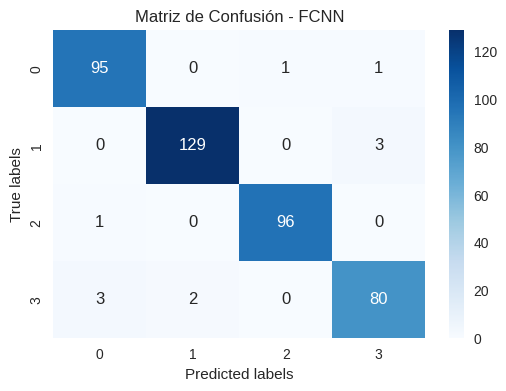

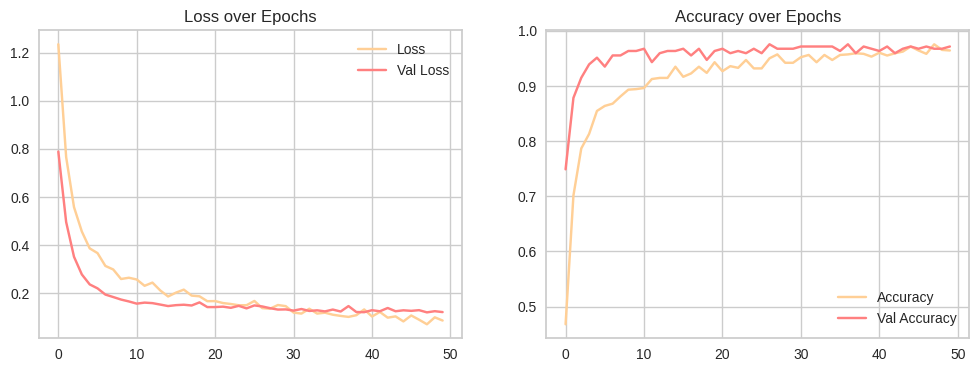

In [60]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que tus datos ya están cargados como X_train, X_test, y_train, y_test

# Normalizar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

input_shape = X_train.shape[1]  # Número de características
num_classes = len(np.unique(y_train))

# Inicializar el modelo FCNN
fcnn_model = Sequential([
    Dense(128, activation='relu', input_shape=(input_shape,)),
    Dropout(0.5),  # Añadir Dropout para regularización
    Dense(64, activation='relu'),
    Dropout(0.5),  # Añadir Dropout para regularización
    Dense(num_classes, activation='softmax')
])

# Compilar el modelo
fcnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history = fcnn_model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1, validation_split=0.2)

# Realizar predicciones
y_pred_fcnn = fcnn_model.predict(X_test)
y_pred_fcnn_classes = y_pred_fcnn.argmax(axis=1)

# Evaluar el rendimiento
accuracy_fcnn = accuracy_score(y_test, y_pred_fcnn_classes)
classification_report_fcnn = classification_report(y_test, y_pred_fcnn_classes)
confusion_mat_fcnn = confusion_matrix(y_test, y_pred_fcnn_classes)

# Mostrar los resultados
print(f"FCNN Classifier Accuracy: {accuracy_fcnn:.2f}")
print("\nClassification Report:")
print(classification_report_fcnn)

# Mostrar la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_mat_fcnn, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión - FCNN")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()

# Graficar la pérdida y la precisión
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss over Epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')

plt.show()

#Agrupación

Para observar la agrupación de clientes en el conjunto de datos, definiré los segmentos de los clientes. Aquí utilizaremos 4 segmentos de clientes igualmente ponderados:

* Estrellas:  Clientes antiguos con altos ingresos y naturaleza de alto gasto.
* Atención Neet:  nuevos clientes con ingresos inferiores al promedio y bajo gasto.
* Alto potencial:  nuevos clientes con altos ingresos y naturaleza de alto gasto.
* Leaky Bucket:  antiguos clientes con ingresos inferiores al promedio y bajo gasto.

En la sección de código siguiente, primero normalizaré los datos y luego crearé una agrupación de clientes de acuerdo con las métricas definidas anteriormente:

In [ ]:
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.mixture import GaussianMixture
import pandas as pd